# **Autor:** ***Julio Yahir Martín Mejía***
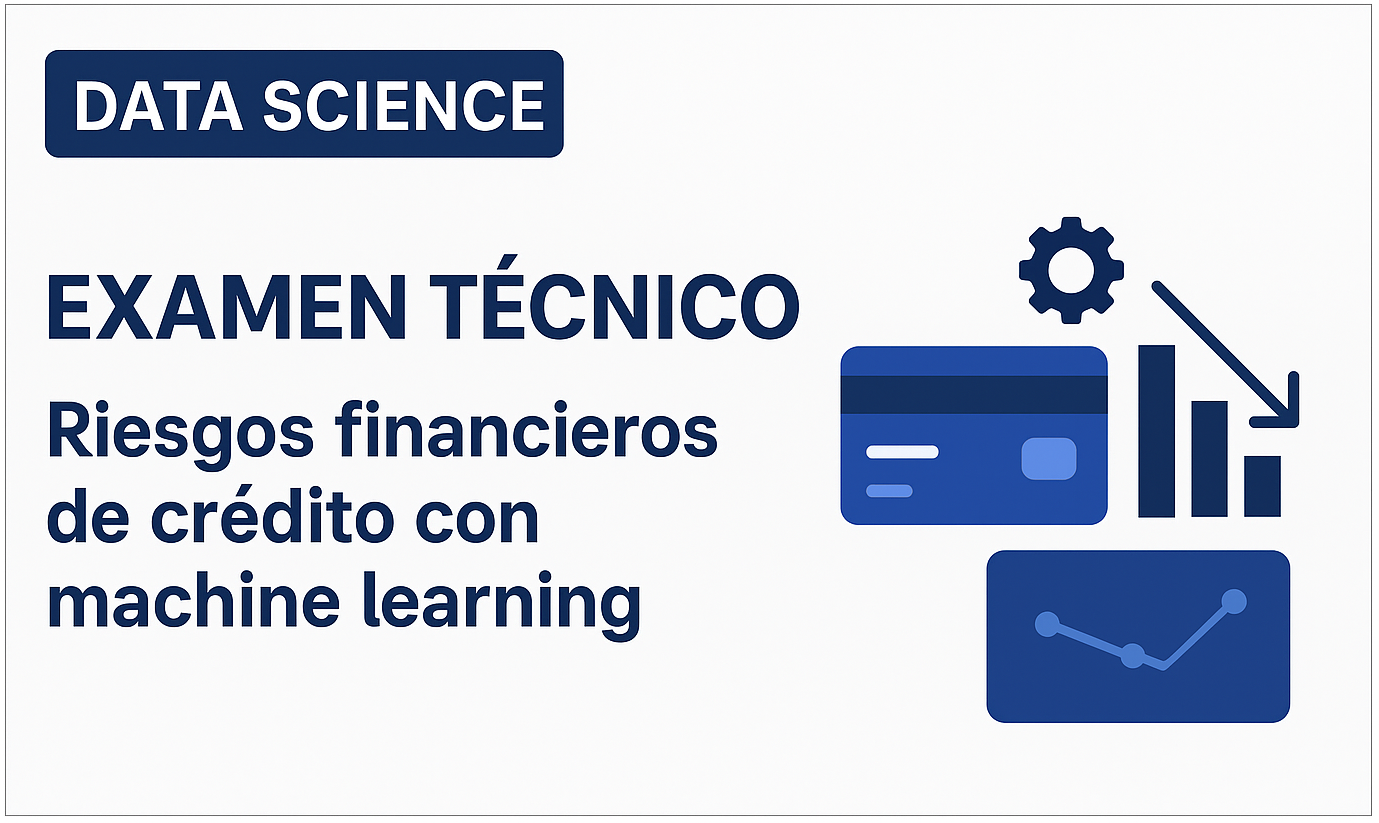

#**Objetivo:**
Llevar a cabo modelos para predecir la variable "PAY_AMT4" (Regresión) y para la varible "default.payment.next.month" (Clasificación) con los siguientes modelos:


**Regresión:**


1.   Regresión Lineal
2.   Bosque Aleatorio (regresión)
3.   XGBoost Regressor
4.   Rede Neuronal de Regresión (TensorFlow)

**Clasificación:**


1.   Regresion Logística
2.   Bosque Aleatorio (clasificación binaria)
3.   XGBoost Classifier (binaria)
4.   Rede Neuronal de Clasificación Binaria (TensorFlow)


NOTA: Se trabajó bajo el entorno de GPU T4 de Google Colab, para trabajar mas rapido con los modelos de XGBoost



#**Descripción del Dataset:**
Dataset obtenido de la siguiente liga: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients


| Variable | Definición |
|---|---|
| ID | ID del Cliente |
| LIMIT_BAL | Monto del crédito otorgado en dólares NT (incluye crédito individual y familiar/suplementario)|
| SEX | Genero (1=Masculino, 2=Femenino)|
| EDUCATION | (1 = escuela de posgrado, 2 = universidad, 3 = escuela preparatoria/secundaria, 4 = otros, 5 = desconocido, 6 = desconocido)
|MARRIAGE|Estado civil (1 = casado, 2 = soltero, 3 = otros)|
|AGE|Edad en años|
|PAY_0|Estado de pago en septiembre de 2005 (-1 = pagó puntualmente, 1 = retraso de pago de un mes, 2 = retraso de pago de dos meses, … 8 = retraso de pago de ocho meses, 9 = retraso de pago de nueve meses o más)|
|PAY_2 | Estado de pago en agosto de 2005 (escala igual que la anterior)|
|PAY_3| Estado de pago en julio de 2005 (escala igual que la anterior)|
|PAY_4| Estado de pago en junio de 2005 (escala igual que la anterior)|
|PAY_5| Estado de pago en mayo de 2005 (escala igual que la anterior)|
|PAY_6| Estado de pago en abril de 2005 (escala igual que la anterior)|
|BILL_AMT1| Monto del estado de cuenta en septiembre de 2005 (dólar NT)|
|BILL_AMT2| Monto del estado de cuenta en agosto de 2005 (dólar NT)|
|BILL_AMT3| Monto del estado de cuenta en julio de 2005 (dólar NT)|
|BILL_AMT4| Monto del estado de cuenta en junio de 2005 (dólar NT)|
|BILL_AMT5| Monto del estado de cuenta en mayo de 2005 (dólar NT)|
|BILL_AMT6| Monto del estado de cuenta en abril de 2005 (dólar NT)|
|PAY_AMT1| Monto del pago anterior en septiembre de 2005 (dólar NT)|
|PAY_AMT2| Monto del pago anterior en agosto de 2005 (dólar NT)|
|PAY_AMT3| Monto del pago anterior en julio de 2005 (dólar NT)|
|PAY_AMT4| Monto del pago anterior en junio de 2005 (dólar NT)|
|PAY_AMT5| Monto del pago anterior en mayo de 2005 (dólar NT)|
|PAY_AMT6| Monto del pago anterior en abril de 2005 (dólar NT)|
|default.payment.next.month| Incumplimiento de pago (1 = sí, 0 = no)|



#**Librerias**

In [311]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) #Forzar a pandas que muestra todas las columnas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, mean_absolute_error, mean_squared_error,r2_score,classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
import shap
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

#**Analisis Exploratorio**

In [312]:
#Lectura del dataset, especificando que la segunda fila son los encabezados y inidcando que el index es la primera columna
df = pd.read_excel('https://github.com/Motsof/Prueba_Tecnica_Riesgos/raw/main/default%20of%20credit%20card%20clients.xls', engine='xlrd',header=1, index_col=0)
#Primeras 5 filas
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                         
1       20000    2          2         1   24      2      2     -1     -1   
2      120000    2          2         2   26     -1      2      0      0   
3       90000    2          2         2   34      0      0      0      0   
4       50000    2          2         1   37      0      0      0      0   
5       50000    1          2         1   57     -1      0     -1      0   

    PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
ID                                                                        
1      -2     -2       3913       3102        689          0          0   
2       0      2       2682       1725       2682       3272       3455   
3       0      0      29239      14027      13559      14331      14948   
4       0      0      46990      48233      49291      28314      28959   
5       0      0       8617       5670      35835      20940      19146   

    BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
ID                                                                          
1           0         0       689         0         0         0         0   
2        3261         0      1000      1000      1000         0      2000   
3       15549      1518      1500      1000      1000      1000      5000   
4       29547      2000      2019      1200      1100      1069      1000   
5       19131      2000     36681     10000      9000       689       679   

    default payment next month  
ID                              
1                            1  
2                            1  
3                            0  
4                            0  
5                            0

Se observa que NO EXISTE PAY_1, posiblemente PAY_0 debio de ser PAY_1


In [313]:
#Observamos como estan defnidas las varibles
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_AMT4  

In [314]:
#Cantidad de Duplicados
df.duplicated().sum()

np.int64(35)

Encontramos 35 duplicados, por lo que procedere a borrarlos del dataframe

In [315]:
#Eliminación de Dupllicados
df.drop_duplicates(inplace=True)

In [316]:
#Cantidad de Nulos
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Se observa un dataset sin nulos, pero en caso de haber existido se hubiera optado por una imputacion basada en KNN

## ***Valores Desconcidos***

In [317]:
#Unicos de las varibles SEX, EDUCATION, MARRIAGE, AGE, PAY's y default payment next month
for col in df[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default payment next month']]:
    print(f"{col}: {[int(x) for x in sorted(df[col].unique())]}")

SEX: [1, 2]
EDUCATION: [0, 1, 2, 3, 4, 5, 6]
MARRIAGE: [0, 1, 2, 3]
AGE: [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79]
PAY_0: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_6: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
default payment next month: [0, 1]


Se dectarón los siguientes valores desconocidos **-2** y **0** en las varibles **PAY** , tambien **0** en **EDUCATION** y **MARRIAGE**.Además no existe el 9 en PAY's que si estaba definido. Implicando un problema a la hora de interpretar resultados.

Revisaremos que podrian significar cada dato no definido:

###Valores de PAY = 0

In [318]:
#Todas las columnas con las varibles PAY en 0
PAY_indef_0 = df[(df['PAY_0'] == 0) & (df['PAY_2'] == 0) & (df['PAY_3'] == 0) & (df['PAY_4'] == 0) & (df['PAY_5'] == 0) & (df['PAY_6'] == 0) ]
#Analisis visual de los primeros diez datos para entender mejor PAY = 0
PAY_indef_0.head(10)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                         
3       90000    2          2         2   34      0      0      0      0   
4       50000    2          2         1   37      0      0      0      0   
6       50000    1          1         2   37      0      0      0      0   
7      500000    1          1         2   29      0      0      0      0   
15     250000    1          1         2   29      0      0      0      0   
26      50000    1          3         2   23      0      0      0      0   
28      50000    2          3         2   30      0      0      0      0   
30      50000    1          1         2   26      0      0      0      0   
33     100000    1          1         2   32      0      0      0      0   
37     280000    1          2         1   40      0      0      0      0   

    PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
ID                                                                        
3       0      0      29239      14027      13559      14331      14948   
4       0      0      46990      48233      49291      28314      28959   
6       0      0      64400      57069      57608      19394      19619   
7       0      0     367965     412023     445007     542653     483003   
15      0      0      70887      67060      63561      59696      56875   
26      0      0      47620      41810      36023      28967      29829   
28      0      0      22541      16138      17163      17878      18931   
30      0      0      15329      16575      17496      17907      18375   
33      0      0      93036      84071      82880      80958      78703   
37      0      0     186503     181328     180422     170410     173901   

    BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
ID                                                                          
3       15549      1518      1500      1000      1000      1000      5000   
4       29547      2000      2019      1200      1100      1069      1000   
6       20024      2500      1815       657      1000      1000       800   
7      473944     55000     40000     38000     20239     13750     13770   
15      55512      3000      3000      3000      3000      3000      3000   
26      30046      1973      1426      1001      1432      1062       997   
28      19617      1300      1300      1000      1500      1000      1012   
30      11400      1500      1500      1000      1000      1600         0   
33      75589      3023      3511      3302      3204      3200      2504   
37     177413      8026      8060      6300      6400      6400      6737   

    default payment next month  
ID                              
3                            0  
4                            0  
6                            0  
7                            0  
15                           0  
26                           0  
28                           0  
30                           0  
33                           0  
37                           0

In [319]:
#Algunas estadisticas
PAY_indef_0.describe()

LIMIT_BAL          SEX    EDUCATION     MARRIAGE          AGE  \
count    9821.000000  9821.000000  9821.000000  9821.000000  9821.000000   
mean   162939.382955     1.596070     1.935343     1.575196    35.305773   
std    128349.011604     0.490709     0.793041     0.520821     9.329839   
min     10000.000000     1.000000     0.000000     0.000000    21.000000   
25%     50000.000000     1.000000     1.000000     1.000000    28.000000   
50%    130000.000000     2.000000     2.000000     2.000000    33.000000   
75%    230000.000000     2.000000     2.000000     2.000000    41.000000   
max    780000.000000     2.000000     6.000000     3.000000    79.000000   

        PAY_0   PAY_2   PAY_3   PAY_4   PAY_5   PAY_6      BILL_AMT1  \
count  9821.0  9821.0  9821.0  9821.0  9821.0  9821.0    9821.000000   
mean      0.0     0.0     0.0     0.0     0.0     0.0   91947.433459   
std       0.0     0.0     0.0     0.0     0.0     0.0   87055.890907   
min       0.0     0.0     0.0     0.0     0.0     0.0    1199.000000   
25%       0.0     0.0     0.0     0.0     0.0     0.0   30892.000000   
50%       0.0     0.0     0.0     0.0     0.0     0.0   62244.000000   
75%       0.0     0.0     0.0     0.0     0.0     0.0  125863.000000   
max       0.0     0.0     0.0     0.0     0.0     0.0  746814.000000   

           BILL_AMT2      BILL_AMT3      BILL_AMT4      BILL_AMT5  \
count    9821.000000    9821.000000    9821.000000    9821.000000   
mean    88530.148254   83973.567152   76615.805621   70459.732716   
std     84173.201194   81167.154739   75964.232496   70822.056830   
min       150.000000       0.000000       0.000000       0.000000   
25%     29398.000000   27911.000000   23960.000000   20246.000000   
50%     59635.000000   55506.000000   49508.000000   46371.000000   
75%    120058.000000  112635.000000  102736.000000   96230.000000   
max    743970.000000  689643.000000  706864.000000  551702.000000   

           BILL_AMT6       PAY_AMT1       PAY_AMT2       PAY_AMT3  \
count    9821.000000    9821.000000    9821.000000    9821.000000   
mean    67346.010488    5926.756033    5612.594644    4831.990632   
std     70013.228247   12200.981833   12300.555664   10438.395327   
min    -39046.000000       0.000000       0.000000       0.000000   
25%     19460.000000    2000.000000    1972.000000    1500.000000   
50%     43471.000000    3133.000000    3000.000000    2705.000000   
75%     92728.000000    6020.000000    5900.000000    5000.000000   
max    699944.000000  300000.000000  340000.000000  324097.000000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6  default payment next month  
count    9821.000000    9821.000000    9821.000000                 9821.000000  
mean     4474.982283    4740.534467    5435.583749                    0.104470  
std     10924.745965   12321.850229   16747.739991                    0.305885  
min         0.000000       0.000000       0.000000                    0.000000  
25%      1018.000000    1046.000000    1000.000000                    0.000000  
50%      2372.000000    2500.000000    2300.000000                    0.000000  
75%      5000.000000    5000.000000    5000.000000                    0.000000  
max    432130.000000  388071.000000  443001.000000                    1.000000

In [320]:
#Grafico que muestra la relacion de cuanto deben de pagar contra lo que pagan para aquellos que tiene en PAY´s= 0
fig = px.scatter(
    data_frame=PAY_indef_0,x='BILL_AMT2', y='PAY_AMT1',
    color=PAY_indef_0['default payment next month'].map({0:'No Default',1:'Default'}).astype(str),
    color_discrete_map={'No Default': '#20E2D7', 'Default': 'red'},
    title='Bill Agosto VS PAY Septiembre de 0',
    labels={'BILL_AMT2': 'Deuda en corte Agosto','PAY_AMT1': 'Pago hecho en Septiembre','color': 'Estatus de Default'}
)

fig.update_layout(
    width=1000,height=700,plot_bgcolor='white',title={'x': 0.5},
    xaxis=dict(showgrid=True,gridcolor='lightgray',linecolor='black',linewidth=2,mirror=True),
    yaxis=dict(showgrid=True,gridcolor='lightgray',linecolor='black',linewidth=2,mirror=True)
)

fig.show()

Se puede indentificar que aquellos que tienen 0 en PAY pagan menos de la deuda, ejemplom el cliente id=15 debia en la fecha de corte de Mayo 56,875 pero solo pago en Junio 3,000.

***Revelando que 0 indica muy probablemente aquellas personas que pagaron abajo de su adeudo y no cubrieron el monto total de la deuda en el pago.***

###Valores de PAY = -2

In [321]:
#Todas las columnas con las varibles PAY en -2
PAY_indef_2 = df[(df['PAY_0'] == -2) & (df['PAY_2'] == -2) & (df['PAY_3'] == -2) & (df['PAY_4'] == -2) & (df['PAY_5'] == -2) & (df['PAY_6'] == -2) ]
#Analisis visual de los primeros diez datos para entender mejor PAY = -2
PAY_indef_2.head(10)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                          
24      450000    2          1         1   40     -2     -2     -2     -2   
34      500000    2          2         1   54     -2     -2     -2     -2   
35      500000    1          1         1   58     -2     -2     -2     -2   
46      210000    1          1         2   29     -2     -2     -2     -2   
53      310000    2          2         1   49     -2     -2     -2     -2   
56      500000    2          1         1   45     -2     -2     -2     -2   
93      100000    2          1         2   27     -2     -2     -2     -2   
101     140000    1          1         2   32     -2     -2     -2     -2   
144     170000    1          2         2   29     -2     -2     -2     -2   
167     370000    1          1         2   50     -2     -2     -2     -2   

     PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
ID                                                                         
24      -2     -2       5512      19420       1473        560          0   
34      -2     -2      10929       4152      22722       7521      71439   
35      -2     -2      13709       5006      31130       3180          0   
46      -2     -2          0          0          0          0          0   
53      -2     -2      13465       7867       7600      11185       3544   
56      -2     -2       1905       3640        162          0        151   
93      -2     -2      -2000       5555          0          0          0   
101     -2     -2        672      10212        850        415        100   
144     -2     -2      12159      10000      10000      10000       9983   
167     -2     -2       6093      15130       8204      15398       4792   

     BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
ID                                                                           
24           0     19428      1473       560         0         0      1128   
34        8981      4152     22827      7521     71439       981     51582   
35        5293      5006     31178      3180         0      5293       768   
46           0         0         0         0         0         0         0   
53         464      7875      7600     11185      3544       464         0   
56        2530      3640       162         0       151      2530         0   
93           0      7555         0         0         0         0         0   
101       1430     10212       850       415       100      1430         0   
144      15846     10000     10000     10000      9983     15863     10000   
167      13453     15383      8204     15413      4792     13453      4699   

     default payment next month  
ID                               
24                            1  
34                            0  
35                            0  
46                            1  
53                            0  
56                            0  
93                            0  
101                           0  
144                           0  
167                           0

In [322]:
#Algunas estadisticas
PAY_indef_2.describe()

LIMIT_BAL          SEX    EDUCATION     MARRIAGE          AGE  \
count    2100.000000  2100.000000  2100.000000  2100.000000  2100.000000   
mean   251933.333333     1.683810     1.679524     1.492857    37.201905   
std    125199.698827     0.465099     0.844036     0.516010     8.651761   
min     10000.000000     1.000000     0.000000     0.000000    21.000000   
25%    160000.000000     1.000000     1.000000     1.000000    30.750000   
50%    230000.000000     2.000000     1.000000     1.000000    36.000000   
75%    340000.000000     2.000000     2.000000     2.000000    43.000000   
max    780000.000000     2.000000     6.000000     3.000000    73.000000   

        PAY_0   PAY_2   PAY_3   PAY_4   PAY_5   PAY_6      BILL_AMT1  \
count  2100.0  2100.0  2100.0  2100.0  2100.0  2100.0    2100.000000   
mean     -2.0    -2.0    -2.0    -2.0    -2.0    -2.0    7443.165714   
std       0.0     0.0     0.0     0.0     0.0     0.0   26160.912853   
min      -2.0    -2.0    -2.0    -2.0    -2.0    -2.0   -8187.000000   
25%      -2.0    -2.0    -2.0    -2.0    -2.0    -2.0       0.000000   
50%      -2.0    -2.0    -2.0    -2.0    -2.0    -2.0    1103.000000   
75%      -2.0    -2.0    -2.0    -2.0    -2.0    -2.0    5283.000000   
max      -2.0    -2.0    -2.0    -2.0    -2.0    -2.0  478030.000000   

           BILL_AMT2      BILL_AMT3      BILL_AMT4      BILL_AMT5  \
count    2100.000000    2100.000000    2100.000000    2100.000000   
mean     6590.851905    6079.688095    5782.537619    5102.791429   
std     21918.605894   19508.261551   19817.522615   15526.028677   
min    -18618.000000  -15641.000000  -65167.000000  -20753.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%       815.000000     737.000000     499.000000     416.000000   
75%      4739.500000    4667.750000    4131.000000    3571.250000   
max    419644.000000  309019.000000  339176.000000  265852.000000   

           BILL_AMT6       PAY_AMT1       PAY_AMT2       PAY_AMT3  \
count    2100.000000    2100.000000    2100.000000    2100.000000   
mean     4876.464762    5145.018095    5190.071905    5064.043810   
std     15234.182104   15658.284335   15059.950207   15967.693009   
min    -57060.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%       390.000000     896.000000     780.000000     500.000000   
75%      3374.750000    4326.000000    4474.000000    3948.500000   
max    227835.000000  298887.000000  200304.000000  344261.000000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6  default payment next month  
count    2100.000000    2100.000000    2100.000000                 2100.000000  
mean     4589.255714    4708.460952    5554.726190                    0.134762  
std     13188.397327   15467.805355   17754.355518                    0.341550  
min         0.000000       0.000000       0.000000                    0.000000  
25%         0.000000       0.000000       0.000000                    0.000000  
50%       440.500000     390.000000     436.000000                    0.000000  
75%      3479.500000    3267.250000    3503.250000                    0.000000  
max    265852.000000  310135.000000  228300.000000                    1.000000

In [323]:
#Grafico que muestra la relacion de cuanto deben de pagar contra lo que pagan para aquellos que tiene en PAY´s= -2
fig = px.scatter(
    data_frame=PAY_indef_2,x='BILL_AMT2', y='PAY_AMT1',
    color=PAY_indef_2['default payment next month'].map({0:'No Default',1:'Default'}).astype(str),
    color_discrete_map={'No Default': '#20E2D7', 'Default': 'red'},
    title='Bill Agosto VS PAY Septiembre de -2',
    labels={'BILL_AMT2': 'Deuda en corte de Agosto','PAY_AMT1': 'Pago hecho en Septiembre','color': 'Estatus de default '}
)

fig.update_layout(
    width=1000,height=700,plot_bgcolor='white',title={'x': 0.5},
    xaxis=dict(showgrid=True,gridcolor='lightgray',linecolor='black',linewidth=2,mirror=True),
    yaxis=dict(showgrid=True,gridcolor='lightgray',linecolor='black',linewidth=2,mirror=True)
)

fig.show()

Aqui se observa que los -2 representan en su gran mayoria buenos clientes ya que pagan lo que deben en su plazo indicado (ya que se forma una linea diagonal) y ademas se nos muestran varios puntos que tenian una deuda muy grande sin embargo su pago fue minimo.

***Por lo PAY -2 es aquellos que pagaron su adeudo en la fecha de corte o que no usaron la tarjeta de credito.***


###Education 0

In [324]:
#Traemos los dato con EDUCATION 0
Educacion = df[df['EDUCATION'] == 0]
Educacion.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
3770      290000    2          0         2   38      1     -1     -1     -1   
5946      270000    1          0         2   39      1     -1     -1     -1   
6877      360000    1          0         2   30      0      0     -1      0   
14632     350000    2          0         2   53     -1     -1     -1     -1   
15108     210000    1          0         2   45     -2     -2     -2     -2   

       PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
ID                                                                           
3770      -1     -1          0       1437       3070       1406       2196   
5946      -1     -2          0      10193      69553      18607          0   
6877       0     -1      40250      23022      12272      34345      36777   
14632     -1     -1       5095       4815      61044      22611       1385   
15108     -2     -2       2563       5854       1032        788       3499   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
ID                                                                             
3770        1481      1437      3078      1406      2196      1481         0   
5946           0     10193     70213     19008       399         0         0   
6877          30     23000     12280     25007     25008      1767      3300   
14632       6043      4840     61349     22687      1389      6058      1153   
15108       3372      5854      1032       788      3565      3372     15381   

       default payment next month  
ID                                 
3770                            0  
5946                            0  
6877                            0  
14632                           0  
15108                           0

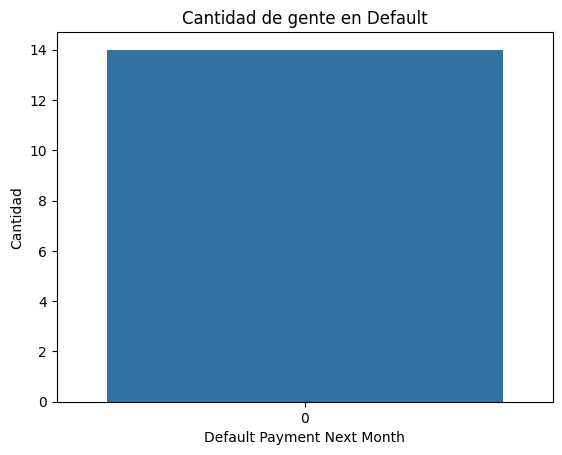

In [325]:
#Cantidad de gente en Default
sns.countplot(x='default payment next month', data=Educacion)
plt.xlabel('Default Payment Next Month')
plt.ylabel('Cantidad')
plt.title('Cantidad de gente en Default')
plt.show()

Interesante solo hay **14 registros** asi en todo el dataset, ademas ninguno cayo en default.

Por lo que se puede inferir es que EDUCATION 0 es algo muy poco comun, tal vez un postdoctor o simplemente el equipo tuvo algun error de dedo.

Dado que **5 y 6** estan categorizados como **desconocido** los uniremos los tres **(0,5,6)** en uno que **seran 5**, donde seran todos los desconocidos

In [326]:
#Cambios de valores EDUCATION 0, 5, 6 a 4
df['EDUCATION'] = df['EDUCATION'].replace([0,5,6], 4)

In [327]:
#Grafico de EDUCACION valor 4 (otro), en su deuda y pagos
fig = px.scatter(
    data_frame=df[df['EDUCATION']==4],x='BILL_AMT2', y='PAY_AMT1',
    color=df[df['EDUCATION']==4]['default payment next month'].map({0:'No Default',1:'Default'}).astype(str),
    color_discrete_map={'No Default': '#20E2D7', 'Default': 'red'},
    title='Bill Agosto VS PAY Septiembre (EDUCATION=4)',
    labels={'BILL_AMT2': 'Deuda en corte de Agosto','PAY_AMT1': 'Pago hecho en Septiembre','color': 'Estatus de default '}
)

fig.update_layout(
    width=1000,height=700,plot_bgcolor='white',title={'x': 0.5},
    xaxis=dict(showgrid=True,gridcolor='lightgray',linecolor='black',linewidth=2,mirror=True),
    yaxis=dict(showgrid=True,gridcolor='lightgray',linecolor='black',linewidth=2,mirror=True)
)

fig.show()

###MARRIAGE con 0

In [328]:
#Datos con varible matrimonio igual a 0
Matrimonio = df[df['MARRIAGE'] == 0]
Matrimonio.head(10)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                           
219      110000    2          3         0   31      0      0      0      0   
810      160000    2          2         0   37      0      0      0      0   
821      200000    2          3         0   51     -1     -1     -1     -1   
1020     180000    2          3         0   45     -1     -1     -2     -2   
1444     200000    1          3         0   51     -1     -1     -1     -1   
2147     150000    2          3         0   55     -1     -1     -1     -1   
2555     220000    2          1         0   33     -1     -1     -1     -1   
3057     200000    1          3         0   36     -2     -2     -2     -2   
4471      70000    1          3         0   35      2      2      2      2   
5006      90000    2          3         0   24     -2     -2     -2     -1   

      PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
ID                                                                          
219       0      0      89989      84229      79288      73315      63818   
810       0      0       2694      38433      38870      28574      27268   
821       0     -1        780          0        390        780        390   
1020     -2     -2       4148          0          0          0          0   
1444      0     -1       3556       4993       9212       2529       1036   
2147     -1     -1       1080      17493       9160       2939       3396   
2555     -1     -1       3378       1531        942        608       1738   
3057     -2     -2       5644      82620      14129      41359       9140   
4471      2      2      47702      48839      49636      50517      51658   
5006      0      0       3700      20833      23968      13574       6800   

      BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
ID                                                                            
219       63208      4000      5000      3000      3000      3000      8954   
810       28021     35888      1325       891      1000      1098       426   
821         390         0       390       780         0       390       390   
1020          0         0         0         0         0         0         0   
1444       4430      5020      9236      2529         0      4430      6398   
2147       1870     17498      9160      2939      3396      1870      6800   
2555        277      1531       942       608      1738       277       492   
3057          0     89187     14178     41359      9140         0         0   
4471      52758      2200      1900      2000      2100      2100      2000   
5006       1830     20108      4000     13574        14         5     13162   

      default payment next month  
ID                                
219                            0  
810                            0  
821                            0  
1020                           0  
1444                           0  
2147                           0  
2555                           0  
3057                           0  
4471                           0  
5006                           0

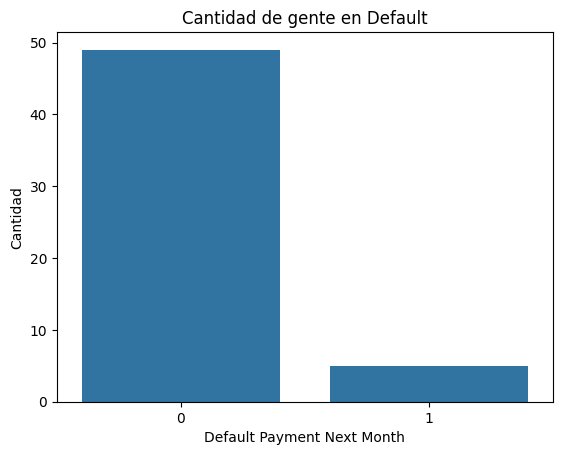

In [329]:
#Grafico de Default en MARRIAGE 0
sns.countplot(x='default payment next month', data=Matrimonio)
plt.xlabel('Default Payment Next Month')
plt.ylabel('Cantidad')
plt.title('Cantidad de gente en Default')
plt.show()

Dado que son aproximmadamente 50 registros, lo mejor es **asignarles el valor de 0 a 3**, que corresponde a la categoria "otros"

In [330]:
#Cambios de valores MARRIAGE que son 0 a 3
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

In [331]:
#Grafico de MARRIAGE (otro), en su deuda y pagos
fig = px.scatter(
    data_frame=df[df['MARRIAGE']==3],x='BILL_AMT2', y='PAY_AMT1',
    color=df[df['MARRIAGE']==3]['default payment next month'].map({0:'No Default',1:'Default'}).astype(str),
    color_discrete_map={'No Default': '#20E2D7', 'Default': 'red'},
    title='Bill Agosto VS PAY Septiembre (MARRIAGE=3)',
    labels={'BILL_AMT2': 'Deuda en corte de Agosto','PAY_AMT1': 'Pago hecho en Septiembre','color': 'Estatus de default '}
)

fig.update_layout(
    width=1000,height=700,plot_bgcolor='white',title={'x': 0.5},
    xaxis=dict(showgrid=True,gridcolor='lightgray',linecolor='black',linewidth=2,mirror=True),
    yaxis=dict(showgrid=True,gridcolor='lightgray',linecolor='black',linewidth=2,mirror=True)
)

fig.show()

###Descubrimientos y Cambios

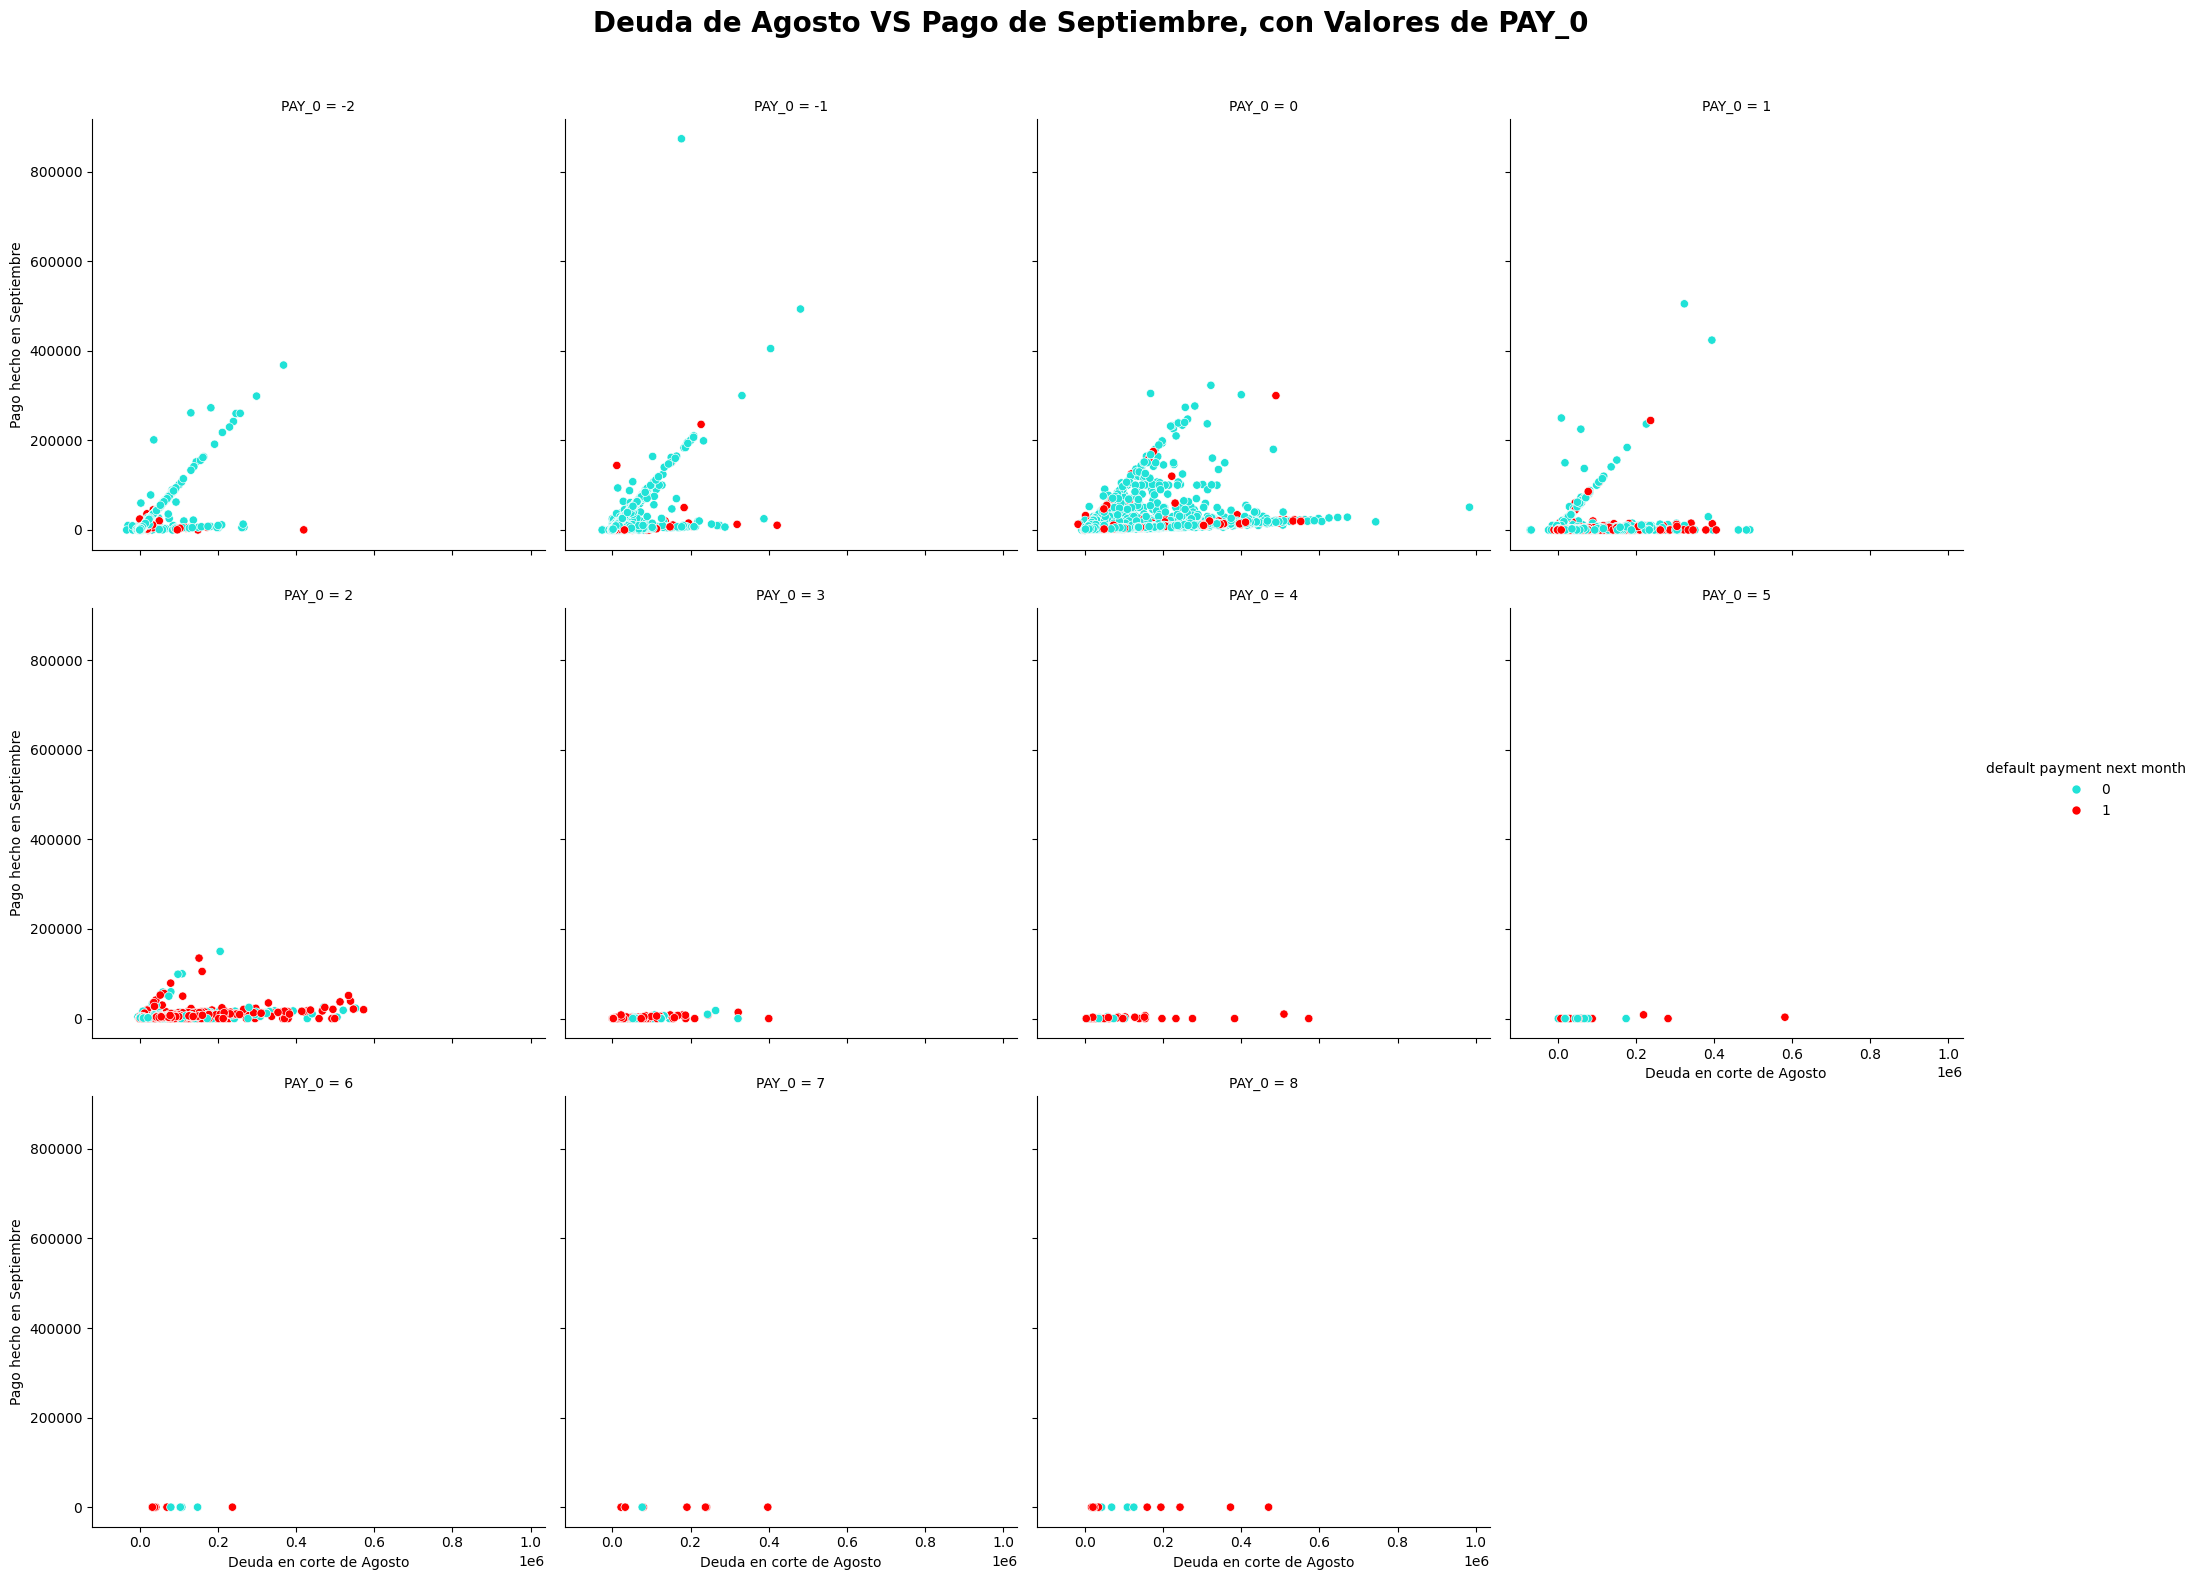

In [332]:
#Graficos que muestran la deuda de Agosto y el Pago hecho para amortizar este, que se realiza en Septiembre, dado el estatus de PAY_0 (estado de pago en Setiembre)
g= sns.relplot(data=df,x='BILL_AMT2', y='PAY_AMT1',hue='default payment next month',palette={0: '#20E2D7', 1: 'red'} ,col='PAY_0',col_wrap=4)
g.set_axis_labels(x_var='Deuda en corte de Agosto',y_var= 'Pago hecho en Septiembre')
g.set_titles(col_template='PAY_0 = {col_name}')
g.fig.suptitle('Deuda de Agosto VS Pago de Septiembre, con Valores de PAY_0', y=1.05,fontsize=20, fontweight='bold')
plt.show()

Se concluyo los siguiente:


| Valores Desconocidos | Posible Definición |
|---|---|
|PAY´s=0| Personas que pagaron abajo de su adeudo y no cubrieron el monto total de la deuda en el pago.|
|PAY´s=-2| Personas que pagaron su adeudo en la fecha de corte o que no usaron la tarjeta de credito. (REALMENTE DIFICIL DE DECIR)|
|EDUCATION=0| Pocos registros(14). Reasignado como 4 (otro), tambien 5 y 6 se reasignaron a 4|
|MARRIAGE=0|Pocos registros(~50). Reasignado como 3 (otro)|

Se observó que existe una relación entre la variable PAY_AMTn y BILL_AMTn₋₁, donde lo ideal sería que si PAY_AMTn = 5,000, entonces BILL_AMTn₋₁ = 5,000. Esto se debe a que PAY_AMTn representa el monto pagado y BILL_AMTn₋₁ corresponde al monto que se debía en el periodo anterior, respectivamente.

Ademas PAY_n, respresenta si el monto de PAY_AMTn cubrio lo de BILL_AMTn₋₁. Por lo que en el mes n ya se sabe cuanto vale BILL_AMTn y que PAY_n es conocido una vez efectuado PAY_AMT_n

##***Correlación de los datos***

In [333]:
#Correlacion del Dataset con pearson
correlacion=df.corr(method='pearson')

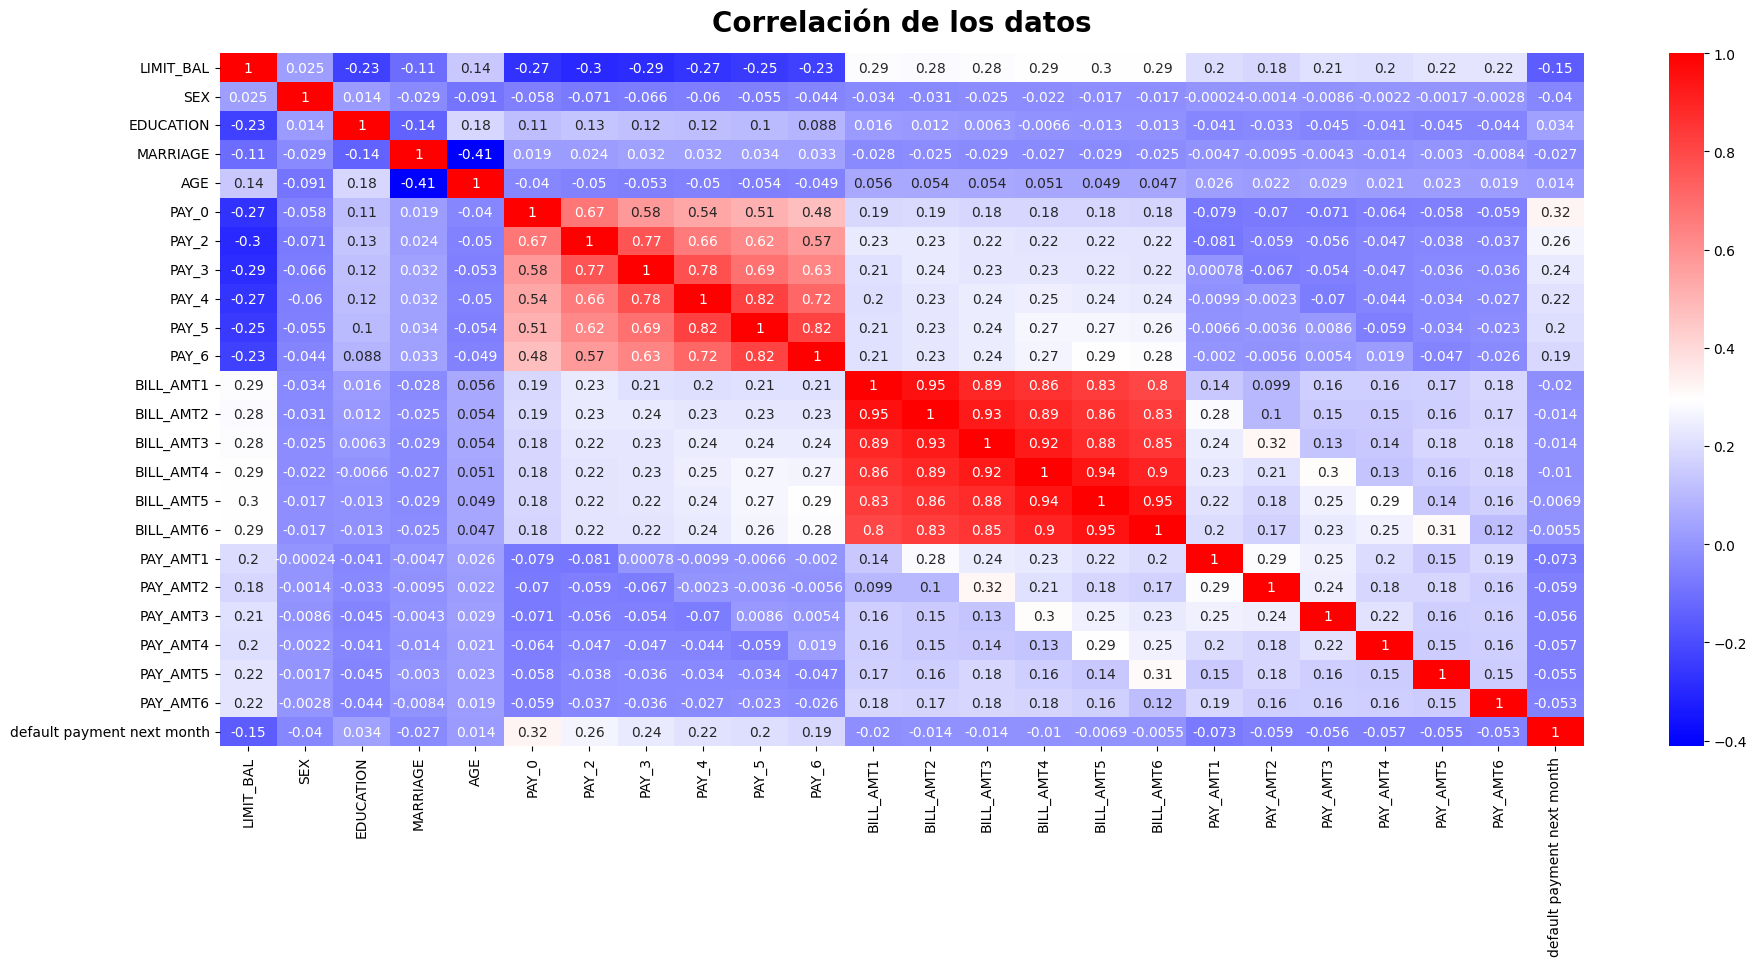

In [334]:
#Mapa de correlacion
plt.figure(figsize=(22,9))
sns.heatmap(correlacion,annot=True, cmap='bwr')
plt.title('Correlación de los datos',fontsize=20, fontweight='bold', y=1.02)
plt.show()

Se observa una correlacion muy extrema en las variables de BILL_AMT y PAY. Dado la naturaleza de los datos se recomienda dejar el ultimo BILL_AMT más reciente y crear una varible AVG_BILL que tomara el promedio de las facturas anteriores, para no perder esa informacion.

Por parte de PAY solo se dejara el mas reciente, ya que por la naturaleza de los datos es lo mas recomendable.

**NOTA:** Este proceso se hace para evitar overfitting y en los modelos de regresion lineal y logistica evitar violación de supuestos.

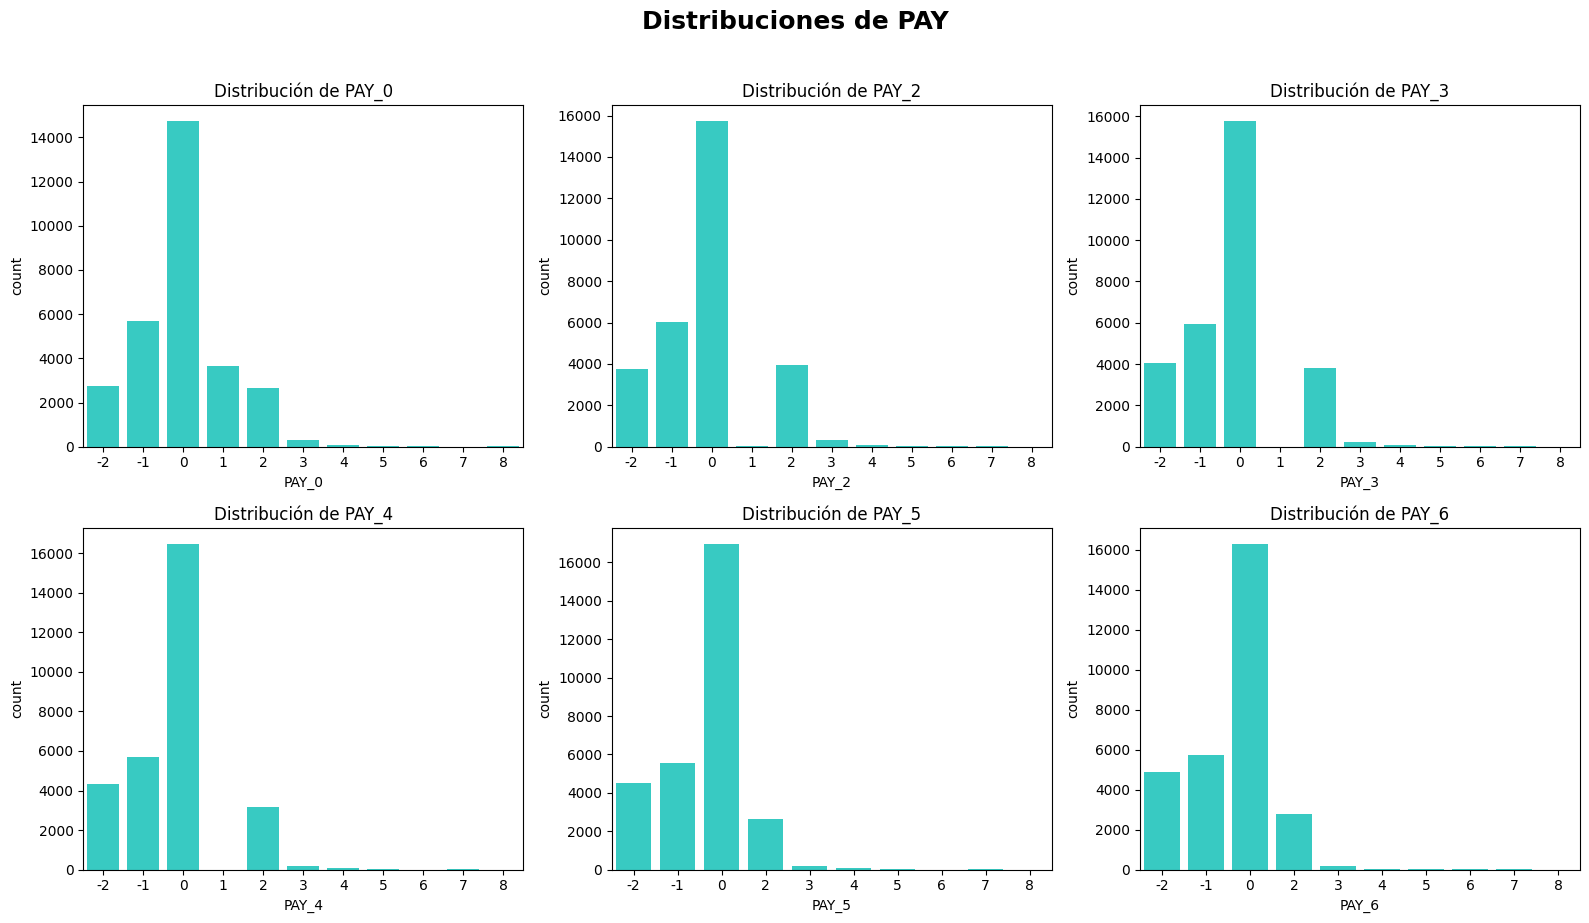

In [335]:
#Distribucion de BILL_AMT
fig, ax = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle('Distribuciones de PAY',fontsize=18, fontweight='bold', y=1.02)
for i, col in enumerate(['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']):
    fila = i // 3
    col_pos = i % 3
    sns.countplot(data=df, x=col, color='#20E2D7',fill=True, ax=ax[fila, col_pos])
    ax[fila, col_pos].set_title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

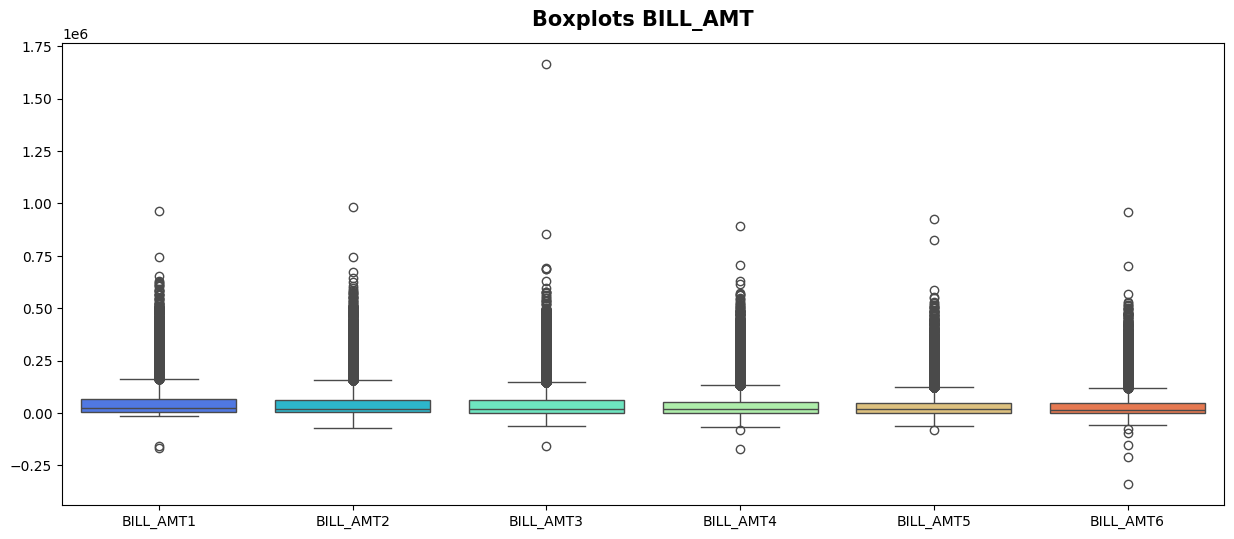

In [336]:
#Grafico para observar outliers de BILL_AMT
plt.figure(figsize=(15,6))
sns.boxplot(df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']],palette='rainbow')
plt.title('Boxplots BILL_AMT', fontsize=15, fontweight='bold', y=1.02)
plt.show()

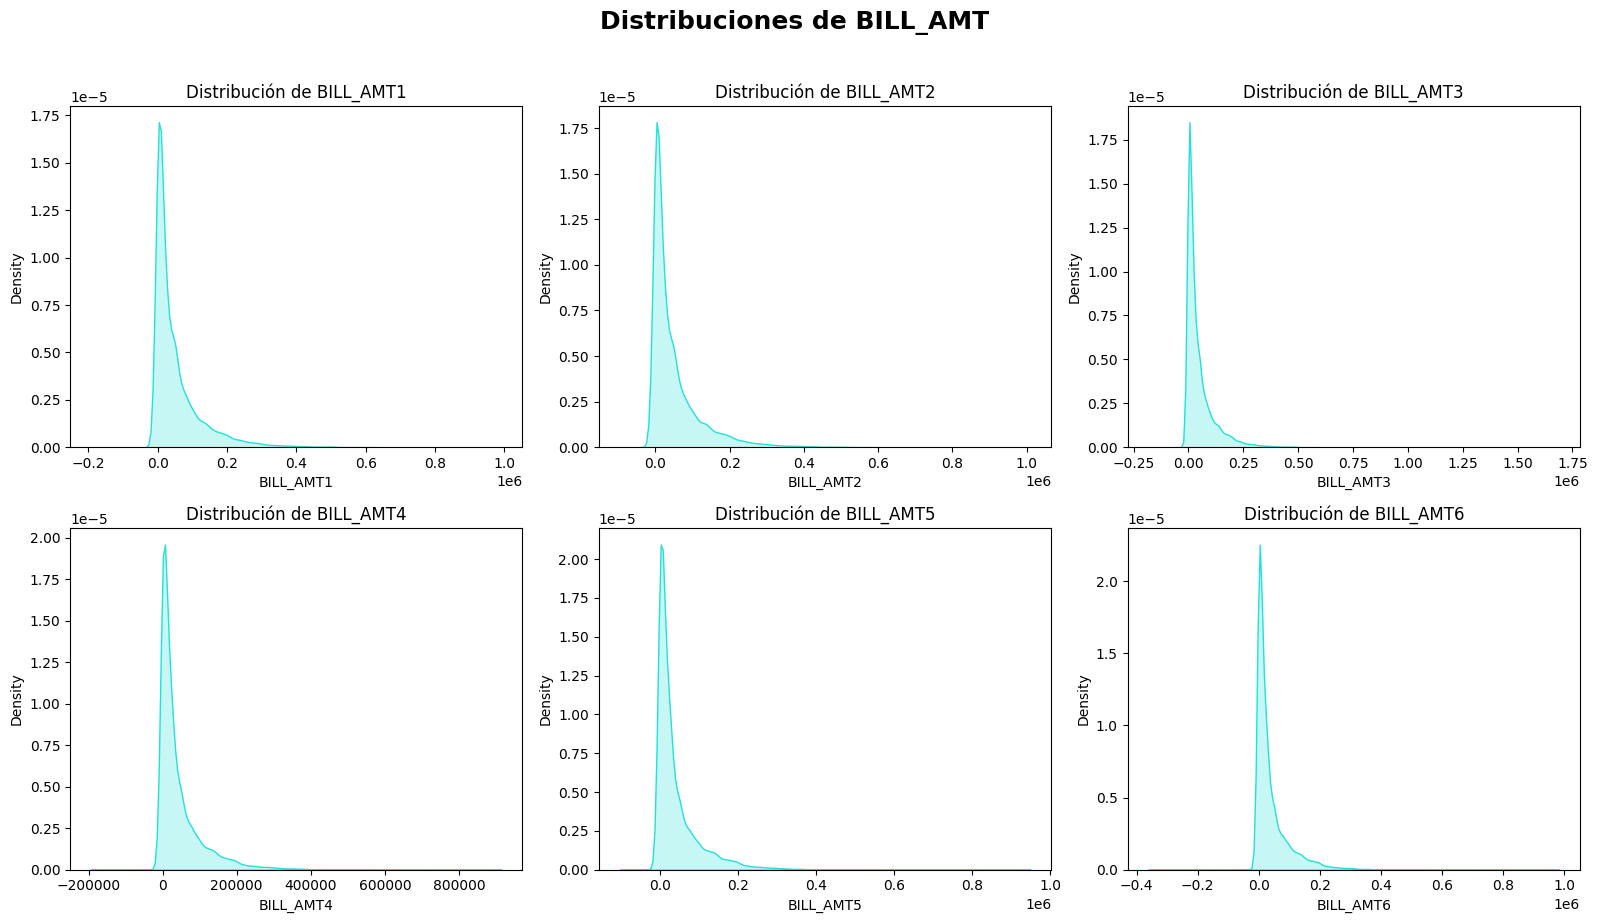

In [337]:
#Distribucion de BILL_AMT
fig, ax = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle('Distribuciones de BILL_AMT',fontsize=18, fontweight='bold', y=1.02)
for i, col in enumerate(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']):
    fila = i // 3
    col_pos = i % 3
    sns.kdeplot(data=df, x=col, color='#20E2D7',fill=True, ax=ax[fila, col_pos])
    ax[fila, col_pos].set_title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

Dado que son **demasiados outliers** y no se distribuyen normal es muy peligroso eliminarlos, ademas de que da informacion importante cada outlier; se optara por **dejarlos**.

**NOTA:**Considerar que esta decición afectara enormemente a los modelos lineales

#**Modelos de Regresión**

##Prepocesamiento de los Datos

In [338]:
#Creacion de una copia de dataframe original, dado que van a haber muchos cambios
df_reg=df.copy()

Se quitaran las variables PAY_0,PAY_2,PAY_3,PAY_4,BILL_AMT1,PAY_2,BILL_AMT2,PAY_3,BILL_AMT3 y default payment next month para evitar dataleakge (fuga de informacion futura)

In [339]:
df_reg.drop(['PAY_AMT1','BILL_AMT1','PAY_AMT2','BILL_AMT2','PAY_AMT3','BILL_AMT3','PAY_0','PAY_2','PAY_3','PAY_4','default payment next month',],axis=1,inplace=True)

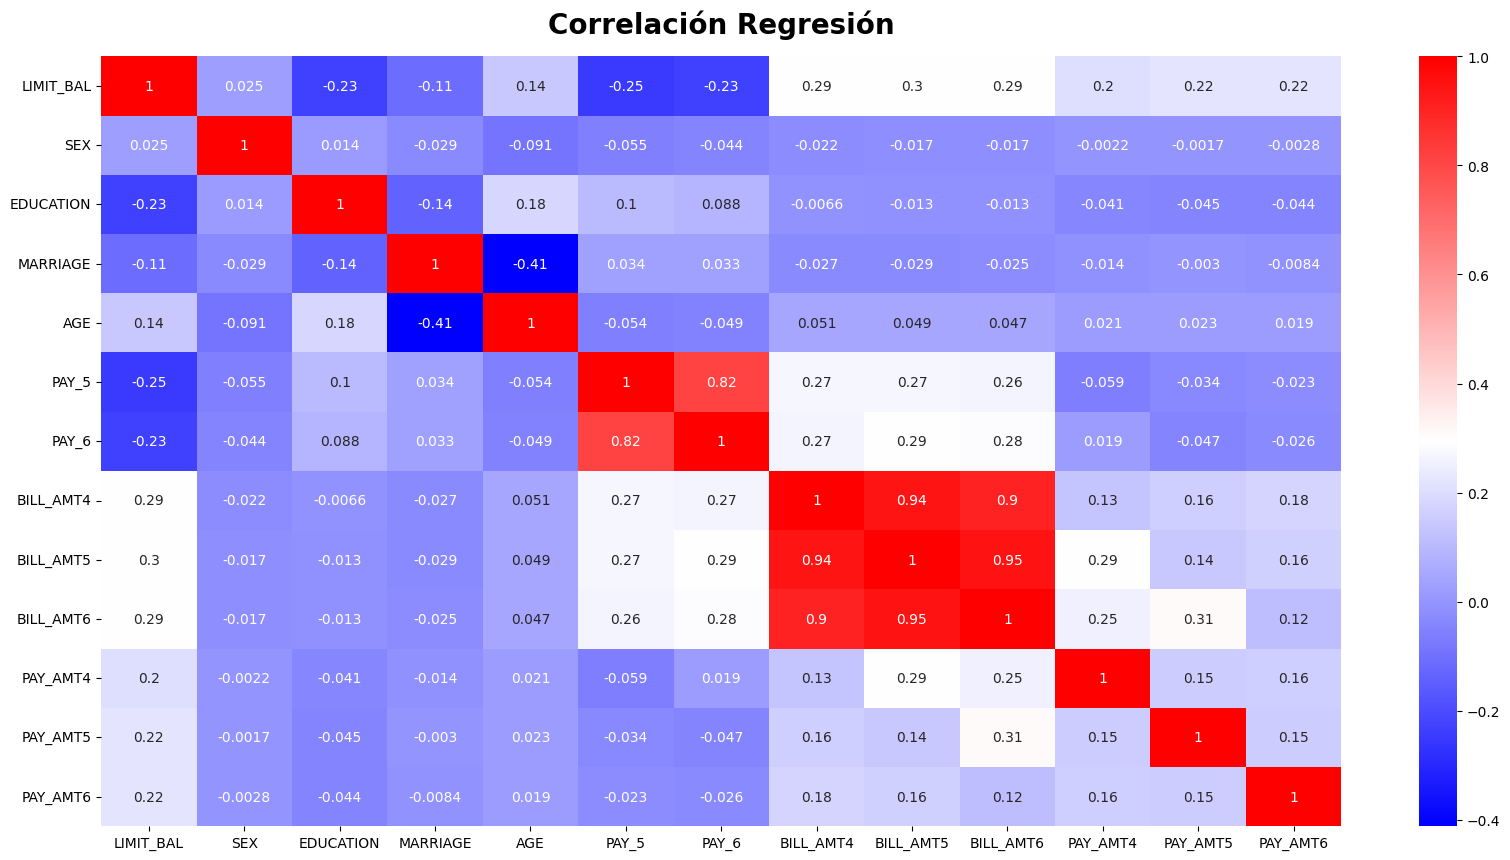

In [340]:
plt.figure(figsize=(20,10))
sns.heatmap(df_reg.corr(),annot=True, cmap='bwr')
plt.title('Correlación Regresión',fontsize=20, fontweight='bold', y=1.02)
plt.show()

In [341]:
#Observamos estadisticas para ver si es sensato crear una varible promedio de BILL_AMT
#df_reg.describe()

In [342]:
#Por la fuerte correlacion se decidio crear una varible que sea el promedio de BILL's
#df_reg['AVG_BILLS']=df_reg[['BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)

In [343]:
#Se descartan las columnas BILL_AMT5, BILL_AMT6, PAY_6
#df_reg.drop(['BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1,inplace=True)

**NOTA:** Tras experimentar con los modelos se observó algo muy interesan; al dejar las varibles de BILL sin sacar transformarlas en promedio, aporta mas infromación al modelo, produciendo mucho mejores predicciones. Pero se dejan comentadas para no olvidar ese paso.

Antes de continuar se detect'o que las varibles **SEX y MARRIAGE** están representadas como Categoricas Ordinales. Sin embargo estas relamente son **Categoricas Nominales**, por lo que se usara **dummies**, ademas de que son pocas etiquetas por categoria (no es necesario un encoder como ordered target statistics).

In [344]:
#Obtenemos dummies
df_reg = pd.get_dummies(df_reg, columns=['SEX', 'MARRIAGE'], drop_first=True)

In [345]:
#Renombramos las columnas para mejor interpretación
df_reg.rename(columns={'SEX_2': 'FEMENINO', 'MARRIAGE_2': 'SOLTERO'}, inplace=True)

In [346]:
#Convertimos en enteros, porque get_dummies da las variales como booleanas
for col in ['FEMENINO','SOLTERO','MARRIAGE_3']:
    df_reg[col]=df_reg[col].astype(int)

In [347]:
#Calculamos el VIF
vif = [variance_inflation_factor(df_reg.drop('PAY_AMT4',axis=1).values, i)
       for i in range(df_reg.drop('PAY_AMT4',axis=1).shape[1])]

#Imprimimos los valores VIF
print(f'---------Valores VIF---------')
print(pd.Series(vif, index=df_reg.drop('PAY_AMT4',axis=1).columns))
print('\n')

---------Valores VIF---------
LIMIT_BAL      3.719302
EDUCATION      6.829748
AGE            9.178449
PAY_5          3.296093
PAY_6          3.337614
BILL_AMT4     12.971878
BILL_AMT5     28.324544
BILL_AMT6     20.784853
PAY_AMT5       1.742114
PAY_AMT6       1.238610
FEMENINO       2.356223
SOLTERO        1.786424
MARRIAGE_3     1.034573
dtype: float64




**CAMBIOS:**

|Varible Nueva | Explicación | Definición|
|---||---|
|AVG_BILL|Creacion por alta correlación, **NO SE REALIZÓ EL CAMBIO, CHECAR NOTA** | Promedio de BILL_6,BILL_5,BILL_4|
|FEMENINO| Obtenida de SEX=2, dado que estaba como categorica ordinal|SEX=2, genero femenino|
|SOLTERO|Obtenida de MARRIAGE=2, dado que estaba como categorica ordinal| Estado marital Soltero|
|MARRIAGE_3|Obtenida de MARRIAGE=3, dado que estaba como categorica ordinal|Estado marital Otro|

Las varibles SEX y MARRIAGE se dummificaron.


In [348]:
#Asignacion de varibles independientes(X) y dependiente(y)
X_reg=df_reg.drop('PAY_AMT4',axis=1)
y_reg=df_reg['PAY_AMT4']

In [349]:
#Separacion de train_lin 80% y test 20%
X_train_lin, X_test, y_train_lin, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
#Separacion de train y validacion en 65%, 15% para modelos de boosting y redes neuronales
X_train, X_val, y_train, y_val = train_test_split(X_train_lin, y_train_lin, test_size=0.15, random_state=42)

##***Regresión Lineal***

In [350]:
#Agegamos la constante a los datos de entrenamiento
X_constant = sm.add_constant(X_train_lin)

#Creacion y ajuste a los datos para un modelo de regresión lineal
lin_reg = sm.OLS(y_train_lin,X_constant)
linear_model=lin_reg.fit()

#Tabla de resultado de la regresión lineal
print(linear_model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.350      
Dependent Variable: PAY_AMT4         AIC:                520237.7004
Date:               2025-08-18 05:14 BIC:                520350.8854
No. Observations:   23972            Log-Likelihood:     -2.6010e+05
Df Model:           13               F-statistic:        995.3      
Df Residuals:       23958            Prob (F-statistic): 0.00       
R-squared:          0.351            Scale:              1.5570e+08 
--------------------------------------------------------------------
             Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
const        717.9928 484.4589   1.4821 0.1383  -231.5771  1667.5628
LIMIT_BAL      0.0101   0.0008  13.4504 0.0000     0.0086     0.0116
EDUCATION    237.4425 115.4909   2.0559 0.0398    11.0730   463.8119
AGE          -14.3645  10.1404  -1.4166 0.1566   -34.

Notamos que tenemos un terrible R^2 de 0.092 que pudo se por los outliers que se decidio dejar.

Las siguientes varibles no aportan: FEMENINO, SOLTERO, MARRIAGE_3, const (el intercepto), EDUCATION ya que no son estadiscamente significativa (coeficiente igual a 0)

In [351]:
#Creacion y ajuste a los datos para un modelo de regresión lineal
lin_reg = sm.OLS(y_train_lin,X_train_lin[['PAY_5','PAY_6','LIMIT_BAL','PAY_AMT6','PAY_AMT5','BILL_AMT6','BILL_AMT5','BILL_AMT4','EDUCATION']])
linear_model=lin_reg.fit()

#Tabla de resultado de la regresión lineal
print(linear_model.summary2())

                         Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.408      
Dependent Variable:     PAY_AMT4         AIC:                         520234.3126
Date:                   2025-08-18 05:14 BIC:                         520307.0744
No. Observations:       23972            Log-Likelihood:              -2.6011e+05
Df Model:               9                F-statistic:                 1836.      
Df Residuals:           23963            Prob (F-statistic):          0.00       
R-squared (uncentered): 0.408            Scale:                       1.5571e+08 
-----------------------------------------------------------------------------------
                  Coef.      Std.Err.      t       P>|t|      [0.025       0.975]  
-----------------------------------------------------------------------------------
PAY_5           -1929.1365   124.9939   -15.4338   0.0000   -2174.1325   -1684.1405
PAY_6            1209.9305   123.

In [352]:
#Predicciones
predicciones_lin=linear_model.predict(X_test[['PAY_5','PAY_6','LIMIT_BAL','PAY_AMT6','PAY_AMT5','BILL_AMT6','BILL_AMT5','BILL_AMT4','EDUCATION']])

In [353]:
# MAE
mae = mean_absolute_error(y_test, predicciones_lin)

# MSE
mse = mean_squared_error(y_test, predicciones_lin)

# RMSE
rmse = np.sqrt(mse)

#R^2
r2 = r2_score(y_test, predicciones_lin)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

MAE: 5178.8790564039155
MSE: 196400826.5488925
RMSE: 14014.307922580141
R^2: 0.2721406988094086


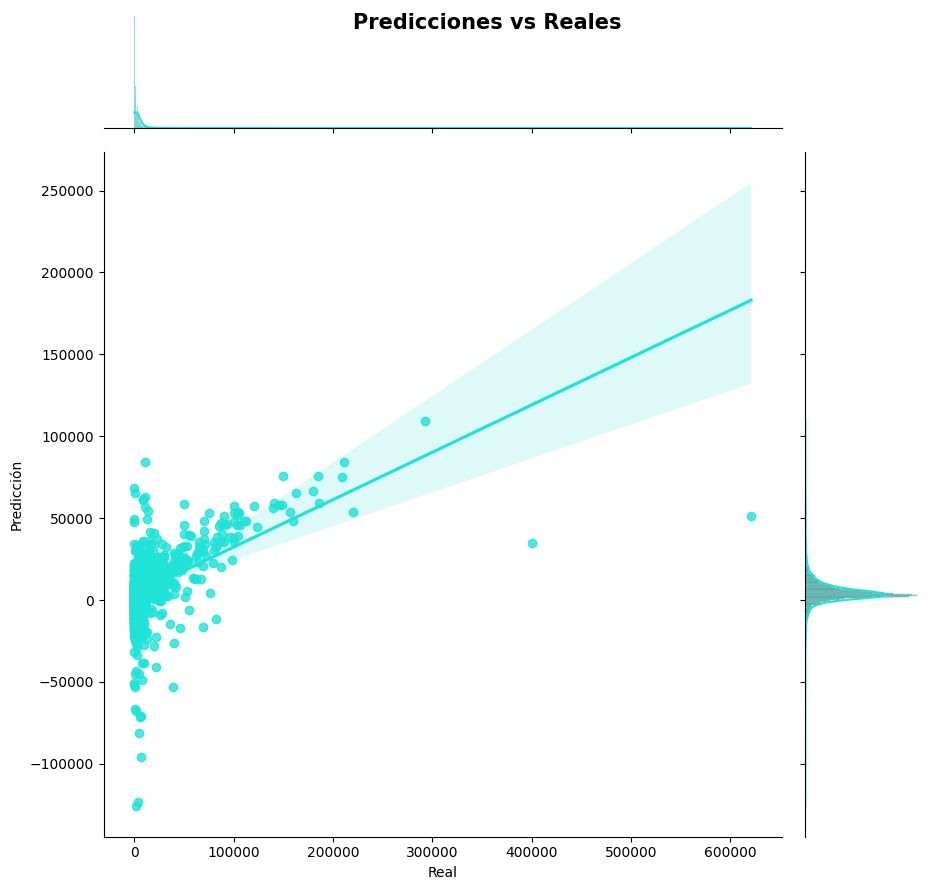

In [354]:
#Grafico de valores predichos contra los valores reales
sns.jointplot(x=y_test,y=predicciones_lin,color='#20E2D7',kind='reg',height=9)
plt.suptitle('Predicciones vs Reales',fontsize=15, fontweight='bold')
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.show()

##***Bosque Aleatorio***

**Se usó una busqueda de hiperparametros y se decidió dejar el codigo. Se comento la linea que ajusta a nuestros datos para evitar correrlo por accidente.**


---



In [355]:
#iniciamos un modelo general
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [356]:
#Posbiles parametros a probar
param_dist = {
    'n_estimators': [100, 200, 300, 400,500],
    'max_depth': [5, 10, 20, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['sqrt', 'log2', 0.5, 0.7, 1.0],
    'bootstrap': [True, False]
}

In [357]:
#Inicamos una busqueada aleatoria de los parametros
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=70,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=1,
    refit=True,
    random_state=42
)

In [358]:
#Iniciamos la Busqueda (tardo 39 minutos)
#random_search_rf.fit(X_train_lin, y_train_lin)

In [359]:
#Resultados
#print("Mejores parámetros:", random_search_rf.best_params_)
#print("Mejor score:", random_search_rf.best_score_)

**Aqui se obtuvieron los hiperparemtros. Por lo que se procede a usarlo en un modelo aparte.**


---



In [360]:
#Creamos el modelo con los mejores paramtros
Bosque_reg=RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators= 200, min_samples_split= 2, min_samples_leaf= 4, max_features= 0.5, max_depth= 50, bootstrap= False)

In [361]:
#Ajustamos el modelo a nuestros datos
Bosque_reg.fit(X_train_lin,y_train_lin)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features=0.5,
                      min_samples_leaf=4, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [362]:
#Obtenemos las predicciones
predicciones_bos_reg = Bosque_reg.predict(X_test)

In [363]:
# MAE
mae = mean_absolute_error(y_test, predicciones_bos_reg)

# MSE
mse = mean_squared_error(y_test, predicciones_bos_reg)

# RMSE
rmse = np.sqrt(mse)

#R^2
r2 = r2_score(y_test, predicciones_bos_reg)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

MAE: 1563.3726455273334
MSE: 67093854.756841235
RMSE: 8191.083857270736
R^2: 0.7513509128468947


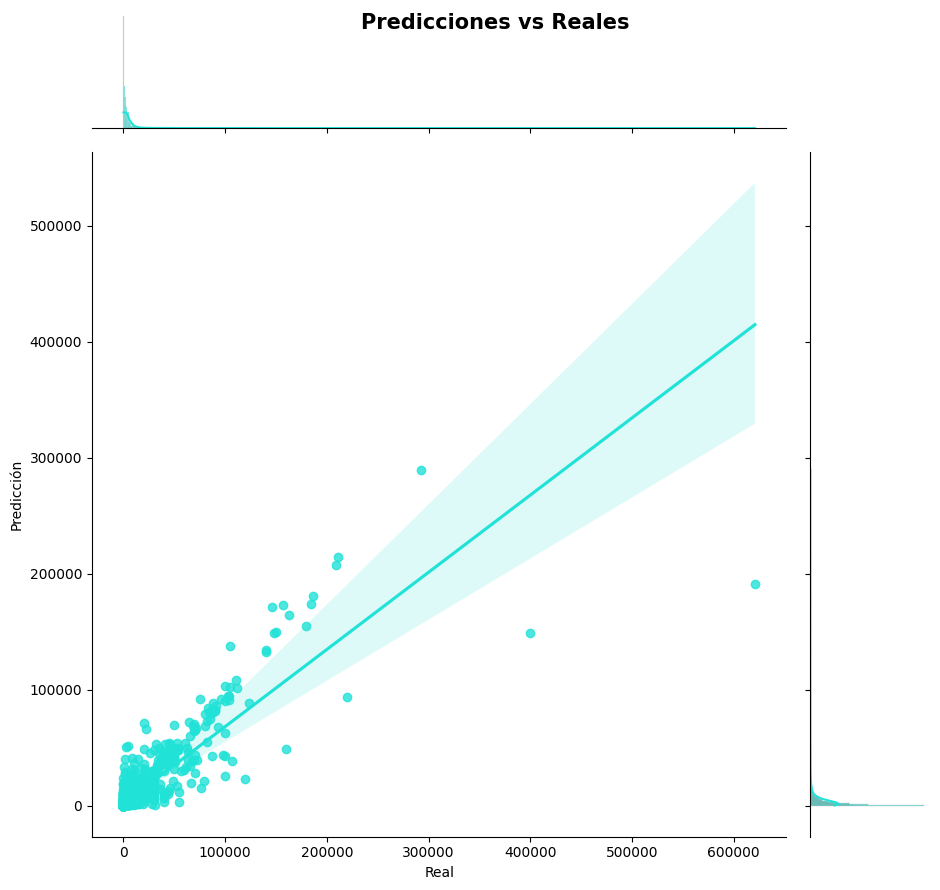

In [364]:
#Grafico de las predicciones contra valores reales
sns.jointplot(x=y_test,y=predicciones_bos_reg,color='#20E2D7',kind='reg',height=9)
plt.suptitle('Predicciones vs Reales',fontsize=15, fontweight='bold')
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.show()

##***XGboost***

**Se usó una busqueda de hiperparametros y se decidió dejar el codigo. Se comento la linea que ajusta a nuestros datos para evitar correrlo por accidente.**


---



In [365]:
#Modelo de XGBoost base para iniciar la busqueda de hiperparametros
xgb_base = XGBRegressor(
    n_estimators=2000,
    objective='reg:absoluteerror',
    tree_method='hist',
    device= 'cuda',
    use_best_model=True,
    early_stopping_rounds=50,
    verbosity=0,
    random_state=42
)

In [366]:
#Hiperparametros a probar
param_grid = {
    'max_depth': [3, 5, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5],
    'min_child_weight': [1, 5, 10],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 1, 10]
}

In [367]:
#Creamos nuestro GridSearchCV
gs = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    scoring='r2',
    cv=3,
    n_iter=150,
    verbose=2,
    n_jobs=1,
    refit=True,
    random_state=42
)

In [368]:
#Empezamos la busqueda (tardo 22 minutos)
#gs.fit(X_train, y_train, eval_set=[(X_val, y_val)],verbose=500)

In [369]:
#Mostramos los resultados
#print("Best params (grid search):", gs.best_params_)
#print("Best CV score (grid search):", gs.best_score_)

**Aqui se obtuvieron los hiperparemtros. Por lo que se procede a usarlo en un modelo aparte.**


---



In [370]:
#Creacion del modelo con los mejores hiperparametros encontrados
XGBoost_reg = XGBRegressor(
    objective='reg:absoluteerror',
    n_estimators=2000,
    subsample= 0.8, reg_lambda= 0.5, reg_alpha= 0, min_child_weight= 4, max_depth= 6, learning_rate= 0.1, gamma= 0.1, colsample_bytree= 0.8, #hiperparametros obtenidos
    tree_method='hist',
    device= 'cuda',
    use_best_model=True,
    early_stopping_rounds=50,
    verbosity=0,
)

In [371]:
#Ajustamos el modelo a nuestros datos
XGBoost_reg.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=200
)

[0]	validation_0-mae:4442.82211
[200]	validation_0-mae:1621.21609
[400]	validation_0-mae:1551.40288
[551]	validation_0-mae:1544.76599


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device='cuda', early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=4, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2000,
             n_jobs=None, num_parallel_tree=None, ...)

In [372]:
#Hacemos las prediciones para los datos de prueba
predicciones_xgboost_reg=XGBoost_reg.predict(X_test)

In [373]:
# MAE
mae = mean_absolute_error(y_test, predicciones_xgboost_reg)

# MSE
mse = mean_squared_error(y_test, predicciones_xgboost_reg)

# RMSE
rmse = np.sqrt(mse)

#R^2
r2 = r2_score(y_test, predicciones_xgboost_reg)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

MAE: 1392.5926513671875
MSE: 70883656.0
RMSE: 8419.243196392417
R^2: 0.7373059391975403


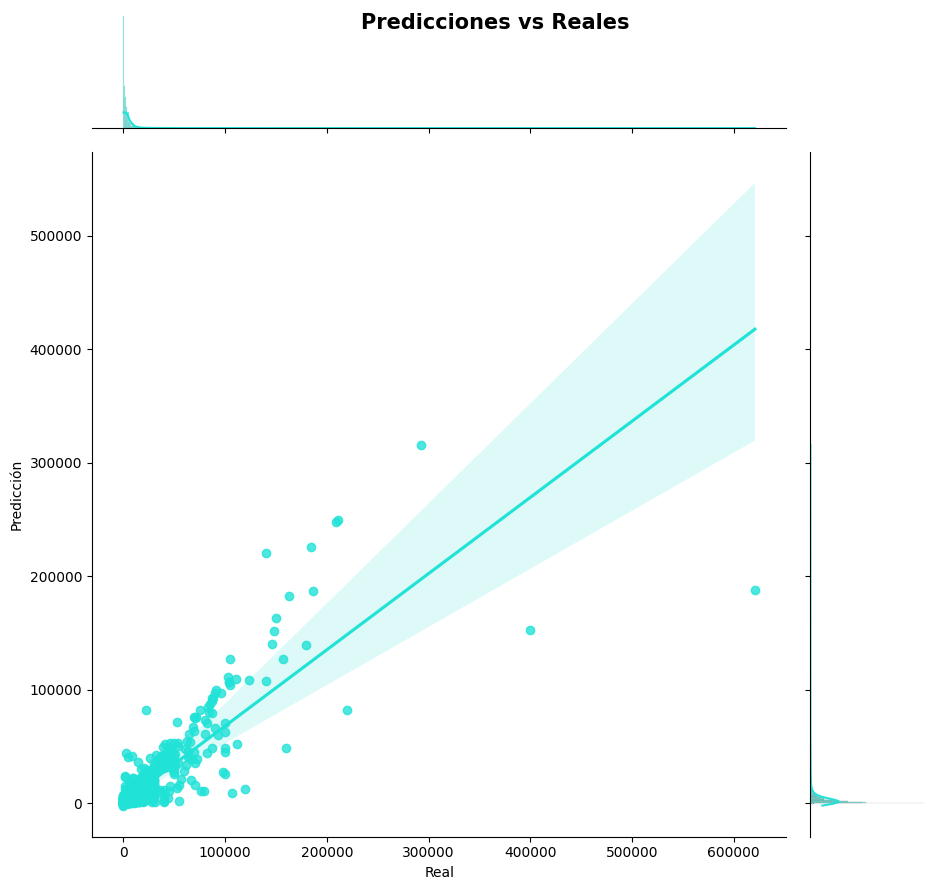

In [374]:
#Grafico de las predicciones contra las reales
sns.jointplot(x=y_test,y=predicciones_xgboost_reg,color='#20E2D7',kind='reg',height=9)
plt.suptitle('Predicciones vs Reales',fontsize=15, fontweight='bold')
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.show()

##***Red Neuronal***

In [375]:
#Escalamos los datos, necesario cuando se trabaja con rede neuronales multicapa
scaler = RobustScaler()
X_train_red = scaler.fit_transform(X_train)
X_test_red = scaler.transform(X_test)
X_val_red = scaler.transform(X_val)

In [376]:
#Iniciamos el modelo
model = Sequential()
#Primera capa con 128 neuronas
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))
#segunda capa con 64 neuronas
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.15))
#tercera capa con 32 neuronas
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.15))
#Capa fina de salida
model.add(Dense(units=1,activation='linear'))
#compilador con metricas
model.compile(optimizer='adam',loss='mse', metrics=['mae','mse'])

In [377]:
#Callback para guardar el modelo y earlystopping
callbacks = [
            EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True, verbose=1),
            ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True, verbose=1),
]

In [378]:
#Ajustamos el modelo a nuestros datos
model.fit(
          x=X_train_red, y=y_train, epochs=200,
          validation_data=(X_val_red, y_val), verbose=1,callbacks=callbacks, shuffle=True
)

Epoch 1/200
637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 224634544.0000 - mae: 4453.2065 - mse: 224634544.0000
Epoch 1: val_loss improved from inf to 264587200.00000, saving model to best_model.keras
637/637 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 224628624.0000 - mae: 4453.2471 - mse: 224628624.0000 - val_loss: 264587200.0000 - val_mae: 5109.7910 - val_mse: 264587200.0000
Epoch 2/200
637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 191764128.0000 - mae: 4629.0063 - mse: 191764128.0000
Epoch 2: val_loss improved from 264587200.00000 to 259813968.00000, saving model to best_model.keras
637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 191785888.0000 - mae: 4629.0459 - mse: 191785888.0000 - val_loss: 259813968.0000 - val_mae: 4774.4360 - val_mse: 259813968.0000
Epoch 3/200
632/637 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 263472128.0000 - mae: 5012.7441 - mse: 263472128.0000
Epoch 3: val_loss improved from 259813968.00000 to 251162080.00000, saving model to best_model.keras
637/637 ━━

In [379]:
#Calculamos las predicciones de la red neuronal
predicciones_red_reg=model.predict(X_test_red)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [380]:
# MAE
mae = mean_absolute_error(y_test, predicciones_red_reg)

# MSE
mse = mean_squared_error(y_test, predicciones_red_reg)

# RMSE
rmse = np.sqrt(mse)

#R^2
r2 = r2_score(y_test, predicciones_red_reg)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

MAE: 1869.9490966796875
MSE: 90880680.0
RMSE: 9533.1358953914
R^2: 0.6631971597671509


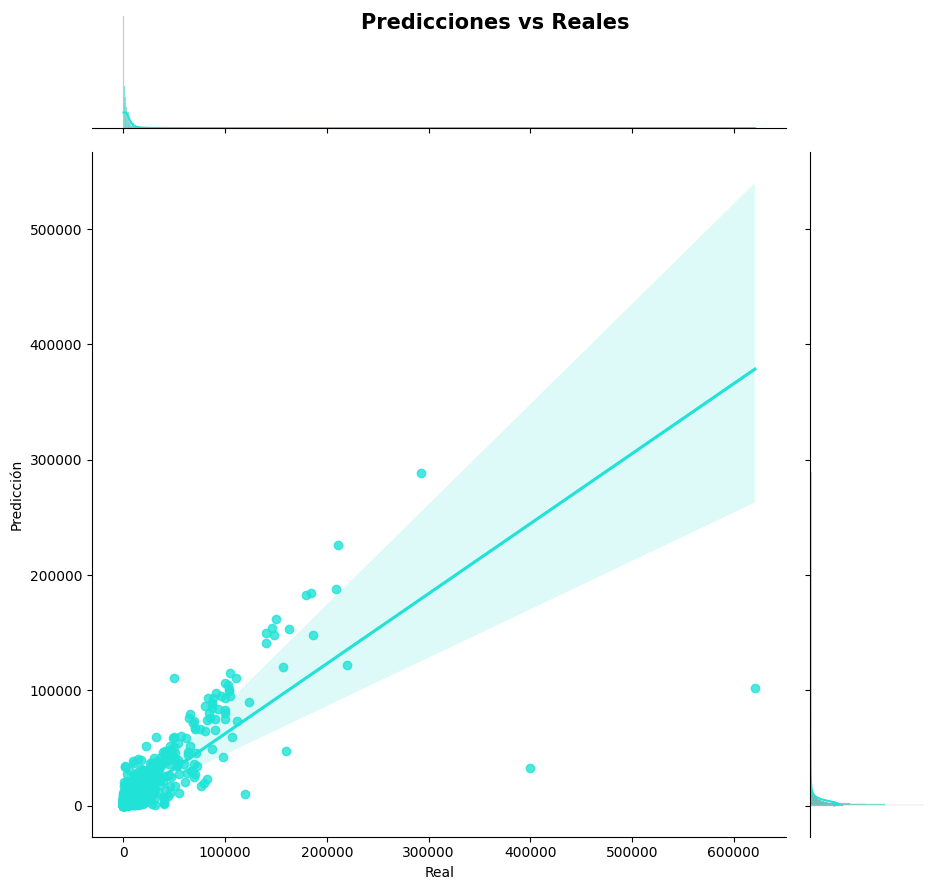

In [381]:
#Grafico de las predicciones contra las reales
sns.jointplot(x=y_test,y=predicciones_red_reg.ravel(),color='#20E2D7',kind='reg',height=9)
plt.suptitle('Predicciones vs Reales',fontsize=15, fontweight='bold')
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.show()

#**Mejor Modelo de Regresión**

Dado que se dejaron outliers nuestra metrica de mayor importancia al elejir el mejor modelo sera del MAE, RMSE y R^2.

Se obtievierón los siguientes resultados:

|Modelo|MAE|RMSE||R^2|
|---||---|---|---|
|Regresión Lineal|5178.88|14014.31|0.272|
|Bosque Aleatorio|1563.37|8191.08|0.751|
|XGBoost|1392.59|8419.24|0.737|
|Red Neuronal|1845.62|9604.69|0.658|

Se puede concluir que **Bosque Aleatorio** tiene un **mejor desempeño** en dos metricas RMSE y R^2. Por lo tanto se escogera como el mejor modelo para regresión.


In [382]:
#Creacion de SHAP values
explainer = shap.Explainer(Bosque_reg, X_train_lin)
shap_values_reg = explainer(X_test)

100%|===================| 5988/5993 [13:03<00:00]       

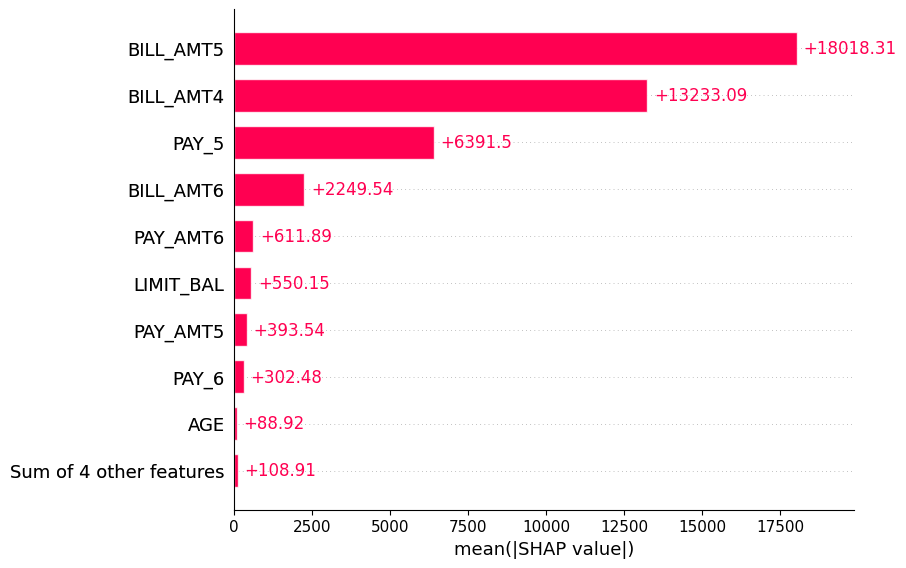

In [383]:
#Grafico valores SHAP
shap.plots.bar(shap_values_reg)
plt.show()

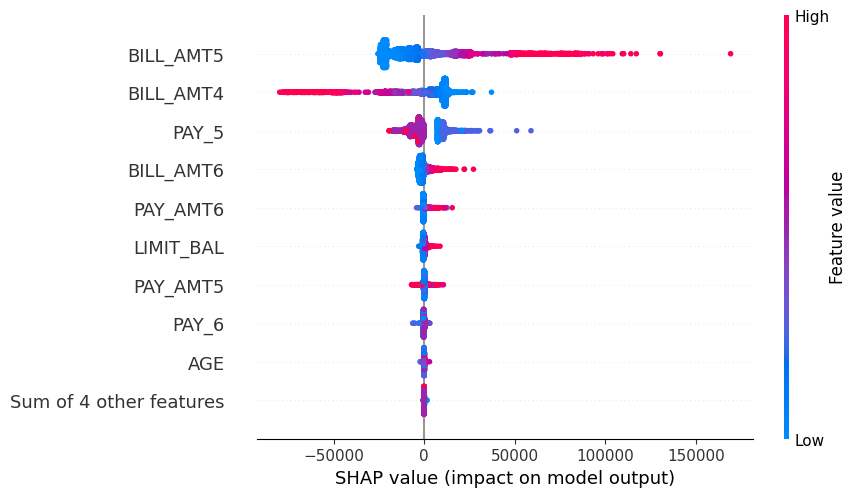

In [384]:
#Grafico del comportamiento de las shap de cada varible
shap.plots.beeswarm(shap_values_reg)
plt.show()

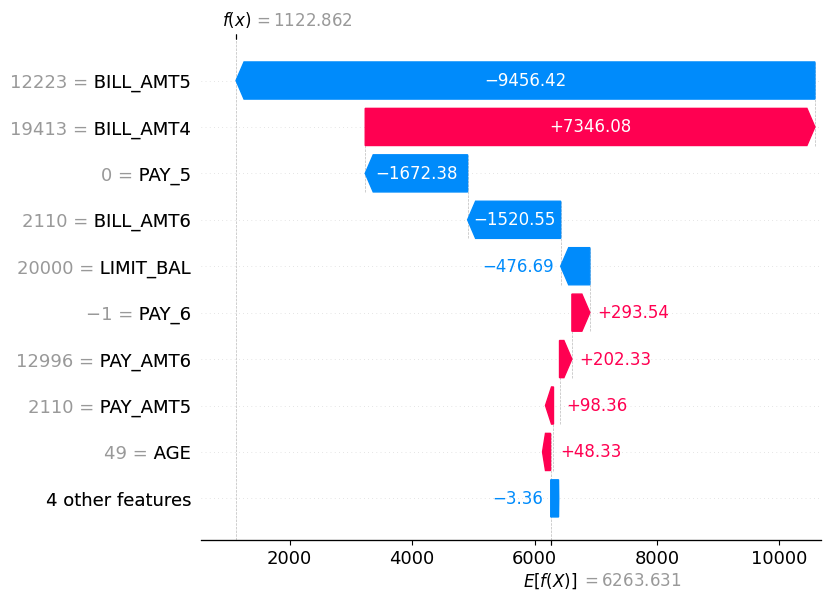

In [385]:
#Ejemplo de prediccion del primer valor de X_test
shap.plots.waterfall(shap_values_reg[2])

Estos gráficos de SHAP nos permiten interpretar cómo el modelo genera sus predicciones. Muestran qué variables son las más influyentes y en qué sentido actúan (positiva o negativamente): un aumento en el valor de una variable puede sumar o restar a la predicción con respecto al valor esperado. Gracias a esto podemos realizar un análisis más profundo del comportamiento del modelo y comprender qué factores empujan las predicciones hacia arriba o hacia abajo.

#**Modelos de Clasificación**

##Preprocesamiento de los datos

In [386]:
#Copia del df original
df_clas=df.copy()

In [387]:
#craecion de varible que contiene el promedio de BILL's por la correlación
df_clas['avg_BILLS'] = df_clas[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)

In [388]:
#Eliminamos las varibles de df
df_clas.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1,inplace=True)

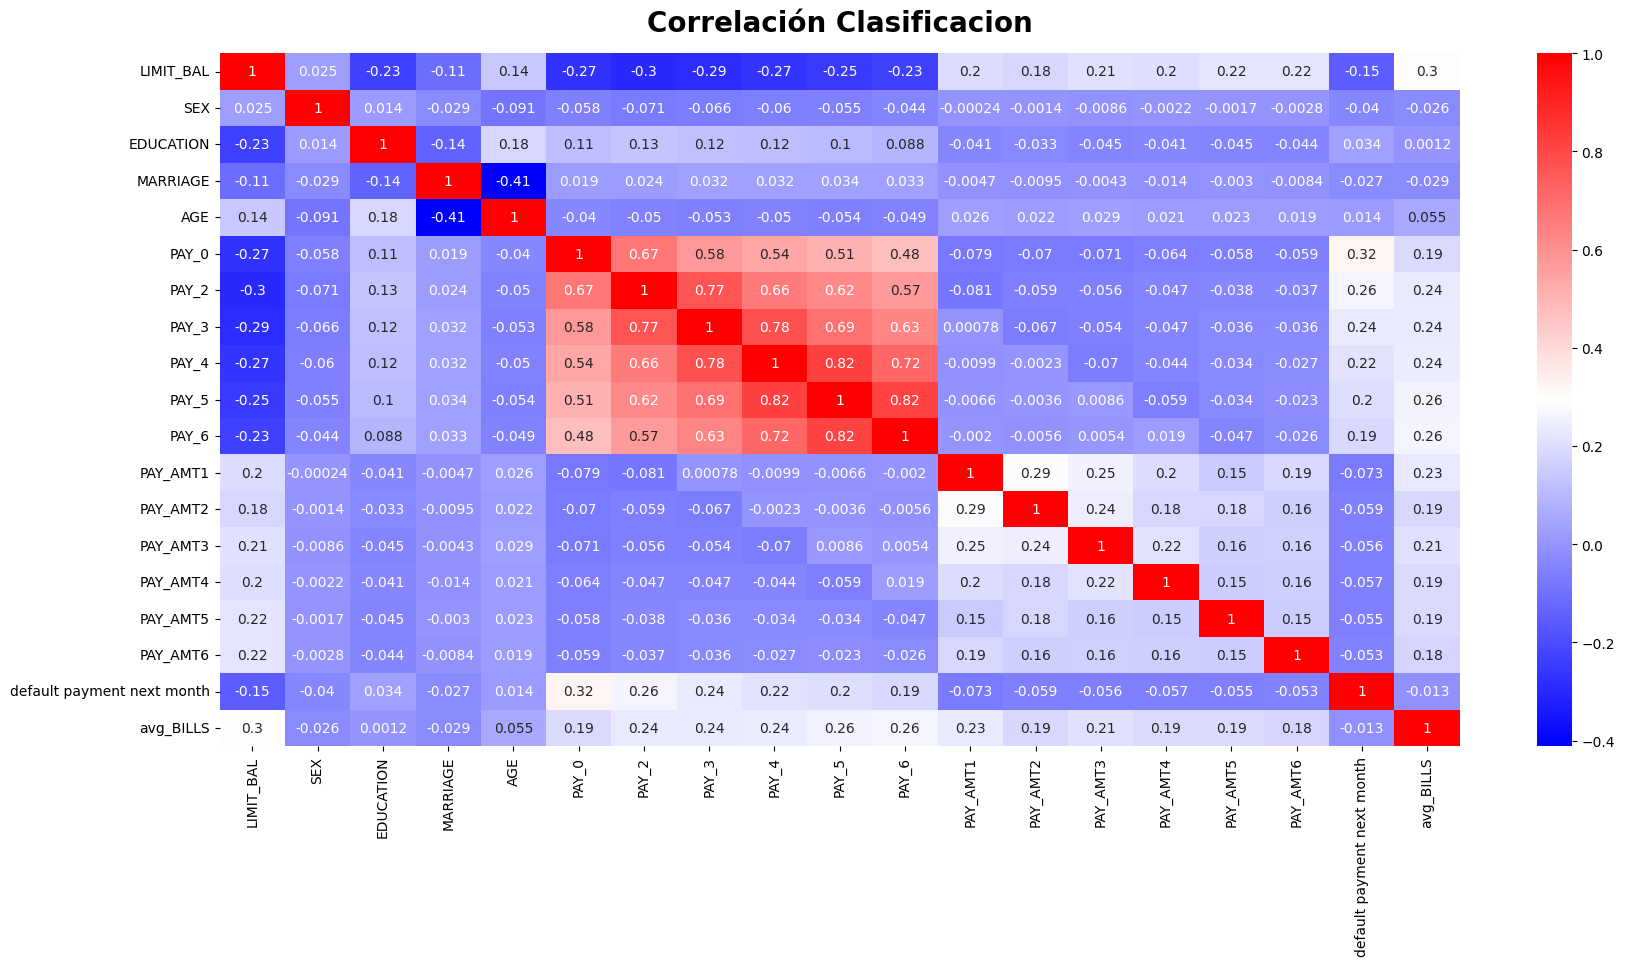

In [389]:
#Realizamos una correlacion de las varibles que iran a los modelos
plt.figure(figsize=(20,9))
sns.heatmap(df_clas.corr(),annot=True,cmap='bwr')
plt.title('Correlación Clasificacion',fontsize=20, fontweight='bold', y=1.02)
plt.show()

In [390]:
#Obtenemos dummies
df_clas = pd.get_dummies(df_clas, columns=['SEX', 'MARRIAGE'], drop_first=True)

In [391]:
#Renombramos las columnas para mejor interpretación
df_clas.rename(columns={'SEX_2': 'FEMENINO', 'MARRIAGE_2': 'SOLTERO'}, inplace=True)

In [392]:
#Convertimos en enteros, porque get_dummies da las variales como booleanas
for col in ['FEMENINO','SOLTERO','MARRIAGE_3']:
    df_clas[col]=df_clas[col].astype(int)

In [393]:
#Calculamos el VIF
vif = [variance_inflation_factor(df_clas.values, i)
       for i in range(df_clas.drop('default payment next month',axis=1).shape[1])]

#Imprimimos los valores VIF
print(f'---------Valores VIF---------')
print(pd.Series(vif, index=df_clas.drop('default payment next month',axis=1).columns))
print('\n')

---------Valores VIF---------
LIMIT_BAL     3.980187
EDUCATION     6.878868
AGE           9.495394
PAY_0         2.003577
PAY_2         3.188330
PAY_3         3.696663
PAY_4         4.413749
PAY_5         4.947160
PAY_6         3.398381
PAY_AMT1      1.359278
PAY_AMT2      1.263347
PAY_AMT3      1.300703
PAY_AMT4      1.256273
PAY_AMT5      1.221142
PAY_AMT6      1.204452
avg_BILLS     1.442870
FEMENINO      2.204836
SOLTERO       2.360405
MARRIAGE_3    1.792724
dtype: float64




Buenos valores de VIF, idicando que nuestros datos estan libres de correlación.

No se considera el VIF de SEX, EDUCATION, MARRIAGE,AGE ya que son varibles categoricas ordinales.

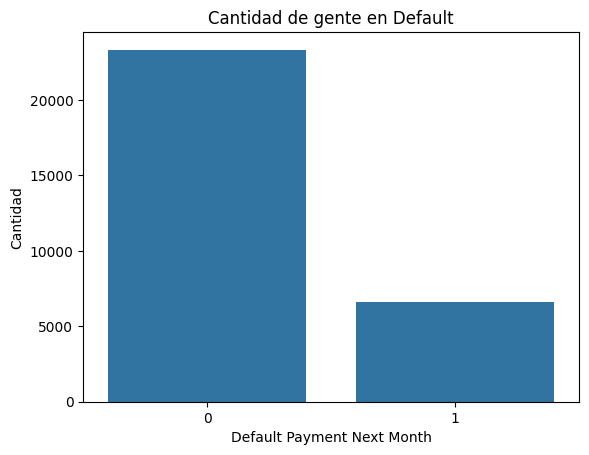

In [394]:
#¿Clase objetivo desbalanceada?
sns.countplot(x='default payment next month', data=df_clas)
plt.xlabel('Default Payment Next Month')
plt.ylabel('Cantidad')
plt.title('Cantidad de gente en Default')
plt.show()

Se observa un **desbalance** de clase, por lo que en cada modelo de clasificación se trendrá en cuenta este detalle para evitar sesgar los modelos.

In [395]:
#Asignacion de varibles independientes(X) y dependiente(y)
X_clas=df_clas.drop('default payment next month',axis=1)
y_clas=df_clas['default payment next month']

In [396]:
#Separacion de train, test y validacion en 65%, 20%,15%
X_train_log, X_test, y_train_log, y_test = train_test_split(X_clas, y_clas, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_log, y_train_log, test_size=0.15, random_state=42)

##***Regresión Logística***

In [397]:
#Aplicamos el sobremuestro para equilibrar la clase minoritaria y el modelo no sea sesgado
X_train_reg_log,y_train_reg_log=SMOTE(random_state=42,sampling_strategy=0.5).fit_resample(X_train_log,y_train_log)

In [398]:
#Agegamos la constante a los datos de entrenamiento
X_constant = sm.add_constant(X_train_reg_log)

In [399]:
#Corremos el Modelo de Regresion Logistica
logit_model=sm.Logit(y_train_reg_log,X_constant)

result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.538606
         Iterations 7
                              Results: Logit
Model:              Logit                      Method:           MLE       
Dependent Variable: default payment next month Pseudo R-squared: 0.154     
Date:               2025-08-18 05:36           AIC:              30194.3835
No. Observations:   27993                      BIC:              30359.1777
Df Model:           19                         Log-Likelihood:   -15077.   
Df Residuals:       27973                      LL-Null:          -17818.   
Converged:          1.0000                     LLR p-value:      0.0000    
No. Iterations:     7.0000                     Scale:            1.0000    
------------------------------------------------------------------------------
                Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
------------------------------------------------------------------------------
const   

In [400]:
#Obtenemos las probabilidades del modelo
predicciones_log=result.predict(sm.add_constant(X_test))

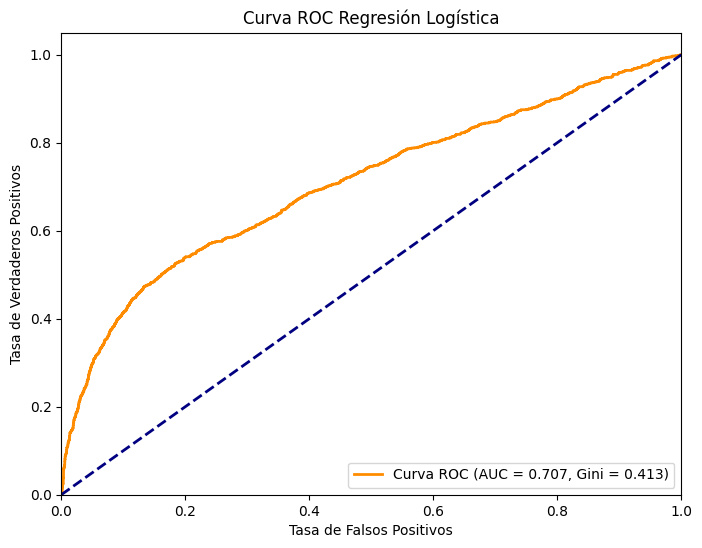

In [401]:
#Calculos para la ROC
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, predicciones_log)
roc_auc_log = auc(fpr_log, tpr_log)
gini_log = 2 * roc_auc_log - 1
#Grafico de lacurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_log:.3f}, Gini = {gini_log:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Regresión Logística')
plt.legend(loc="lower right")
plt.show()

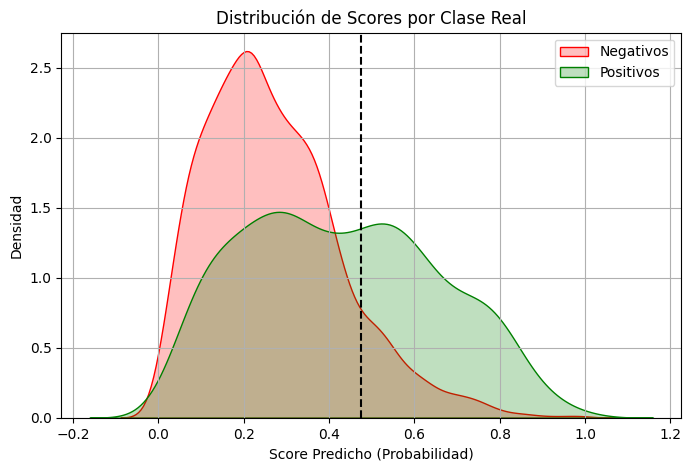

In [402]:
#Probabilidades por clase real
probs_negativos = predicciones_log[y_test == 0]
probs_positivos = predicciones_log[y_test == 1]

#Grafico de las distribuciones
plt.figure(figsize=(8, 5))
sns.kdeplot(probs_negativos, fill=True, color='red', label='Negativos')
sns.kdeplot(probs_positivos, fill=True, color='green', label='Positivos')

#Umbral
umbral = 0.475
plt.axvline(umbral, color='black', linestyle='--')

plt.title('Distribución de Scores por Clase Real')
plt.xlabel('Score Predicho (Probabilidad)')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

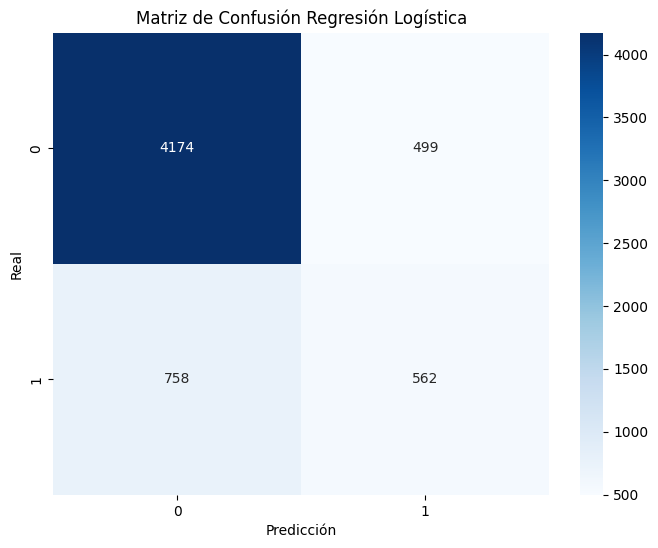

In [403]:
# Hacer predicciones con el modelo entrenado (0 y 1)
y_pred_log_clas = (predicciones_log >= 0.475).astype(int)

# Crear la matriz de confusion
matriz_confusion_log = confusion_matrix(y_test, y_pred_log_clas)
#Grafico de la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_log, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Regresión Logística')
plt.show()

In [404]:
#Obtenemos las metricas mas importantes
print(classification_report(y_test, y_pred_log_clas,digits=3))

              precision    recall  f1-score   support

           0      0.846     0.893     0.869      4673
           1      0.530     0.426     0.472      1320

    accuracy                          0.790      5993
   macro avg      0.688     0.659     0.671      5993
weighted avg      0.777     0.790     0.782      5993



##***Bosque Aleatorio***

**Se usó una busqueda de hiperparametros y se decidió dejar el codigo. Se comento la linea que ajusta a nuestros datos para evitar correrlo por accidente.**


---



In [405]:
#iniciamos un modelo general
rf_clas = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced" )

In [406]:
#Posbiles parametros a probar
param_dist = {
    'n_estimators': [100, 200, 300, 400,500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['sqrt', 'log2', 0.7, 1.0],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'class_weight': ['balanced', 'balanced_subsample']
}

In [407]:
#Inicamos una busqueada aleatoria de los parametros con RandomizedSearchCV
rs_rf_clas = RandomizedSearchCV(
    estimator=rf_clas,
    param_distributions=param_dist,
    n_iter=30,
    scoring='recall',
    cv=3,
    verbose=2,
    n_jobs=1,
    random_state=42
)

In [408]:
#Iniciamos la Busqueda (tardo >1 hora)
#rs_rf_clas.fit(X_train_log, y_train_log)

In [409]:
#Mostramos los resultados
#print("Best params (grid search):", rs_rf_clas.best_params_)
#print("Best CV score (grid search):", rs_rf_clas.best_score_)

**Aqui se obtuvieron los hiperparemtros. Por lo que se procede a usarlo en un modelo aparte.**


---



In [410]:
#Creamos el modelo con los mejores parametros encontrados
Bosque_clas=RandomForestClassifier(n_estimators= 400, min_samples_split= 10, min_samples_leaf= 10, max_features='sqrt', max_depth= 20, criterion='entropy', class_weight='balanced',bootstrap= False,random_state=42, n_jobs=-1)

In [411]:
#Ajustamos nuestros datos al modelo
Bosque_clas.fit(X_train_log, y_train_log)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_depth=20, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=400, n_jobs=-1,
                       random_state=42)

In [412]:
#Obtenemos las probabilidades del modelo
Predicciones_bosque_clas = Bosque_clas.predict_proba(X_test)[:,1]

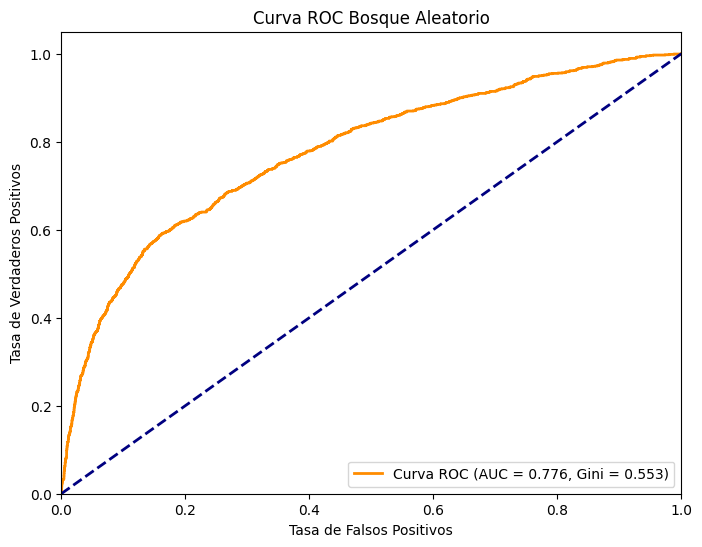

In [413]:
#Calculos para la ROC
fpr_bosque, tpr_bosque, thresholds_bosque = roc_curve(y_test, Predicciones_bosque_clas)
roc_auc_bosque = auc(fpr_bosque, tpr_bosque)
gini_bosque = 2 * roc_auc_bosque - 1
#Grafico de lacurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_bosque, tpr_bosque, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_bosque:.3f}, Gini = {gini_bosque:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Bosque Aleatorio')
plt.legend(loc="lower right")
plt.show()

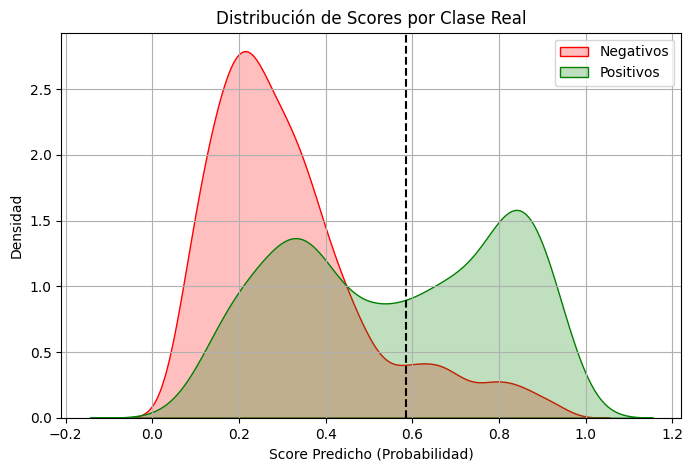

In [414]:
#Probabilidades por clase real
probs_negativos = Predicciones_bosque_clas[y_test == 0]
probs_positivos = Predicciones_bosque_clas[y_test == 1]

#Grafico de las distribuciones
plt.figure(figsize=(8, 5))
sns.kdeplot(probs_negativos, fill=True, color='red', label='Negativos')
sns.kdeplot(probs_positivos, fill=True, color='green', label='Positivos')

#Umbral
umbral = 0.586
plt.axvline(umbral, color='black', linestyle='--')

plt.title('Distribución de Scores por Clase Real')
plt.xlabel('Score Predicho (Probabilidad)')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

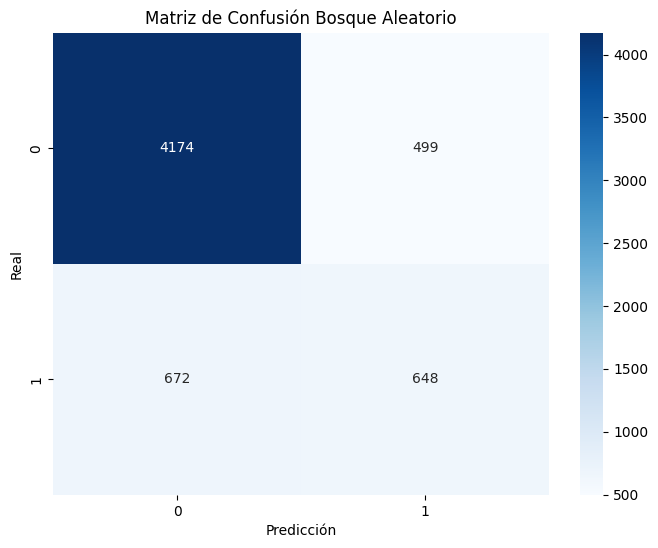

In [415]:
# Hacer predicciones con el modelo entrenado (0 y 1)
y_pred_bosque_clas = (Predicciones_bosque_clas >= 0.586).astype(int)

# Crear la matriz de confusion
matriz_confusion_bosque = confusion_matrix(y_test, y_pred_bosque_clas)
#Grafico de la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_bosque, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Bosque Aleatorio')
plt.show()

In [416]:
#Obtenemos las metricas mas importantes
print(classification_report(y_test, y_pred_bosque_clas,digits=3))

              precision    recall  f1-score   support

           0      0.861     0.893     0.877      4673
           1      0.565     0.491     0.525      1320

    accuracy                          0.805      5993
   macro avg      0.713     0.692     0.701      5993
weighted avg      0.796     0.805     0.800      5993



##***XGBoost***

In [417]:
#Varible para el Balance de clases
neg, pos = np.bincount(y_train)

**Se usó una busqueda de hiperparametros y se decidió dejar el codigo. Se comento la linea que ajusta a nuestros datos para evitar correrlo por accidente.**


---



In [418]:
#Un modelo XGB base para buscar hiperparametros usar GPU
xgb_clas_base = XGBClassifier(
    n_estimators=2000,
    objective='binary:logistic',
    tree_method='hist',
    device='cuda',
    eval_metric=['logloss','aucpr'],
    random_state=42,
    scale_pos_weight= neg / pos,
    early_stopping_rounds=50
)

In [419]:
#Hiperparametros a probar
param_grid = {
    'max_depth': [3, 5, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5],
    'min_child_weight': [1, 5, 10],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 1, 10]
}

In [420]:
#Creamos nuestro RandomizedSearchCV
gs = RandomizedSearchCV(
    estimator=xgb_clas_base,
    param_distributions=param_grid,
    scoring='recall',
    cv=3,
    n_iter=150,
    verbose=2,
    n_jobs=1,
    refit=True,
    random_state=42
)

In [421]:
#Empezamos la busqueda (tardo 9 minutos)
#gs.fit(X_train, y_train,eval_set=[(X_val, y_val)],verbose=500)

In [422]:
#Mostramos los resultados
#print("Best params (grid search):", gs.best_params_)
#print("Best CV score (grid search):", gs.best_score_)

**Aqui se obtuvieron los hiperparemtros. Por lo que se procede a usarlo en un modelo aparte.**


---



In [423]:
#Creación del modelo con los hiperparametros encontrados
XGBoost_clas=XGBClassifier(
    n_estimators=2000,
    objective='binary:logistic',
    tree_method='hist',
    device='cuda',
    eval_metric=['logloss','aucpr'],
    random_state=42,
    scale_pos_weight= neg / pos,
    early_stopping_rounds=50,
    subsample= 0.8, reg_lambda= 1, reg_alpha= 1, min_child_weight= 2, max_depth= 2, learning_rate= 0.15, gamma= 0, colsample_bytree= 0.8 #hiperparametros obtenidos
)

In [424]:
#Ajuste de los datos a nuestro modelo
XGBoost_clas.fit(X_train, y_train,eval_set=[(X_val, y_val)],verbose=500)

[0]	validation_0-logloss:0.66545	validation_0-aucpr:0.51591
[173]	validation_0-logloss:0.53503	validation_0-aucpr:0.57623


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device='cuda', early_stopping_rounds=50,
              enable_categorical=False, eval_metric=['logloss', 'aucpr'],
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2000, n_jobs=None,
              num_parallel_tree=None, ...)

In [425]:
#Probabilidades predichas por el modelo
Predicciones_xgboost_clas=XGBoost_clas.predict_proba(X_test)[:, 1]

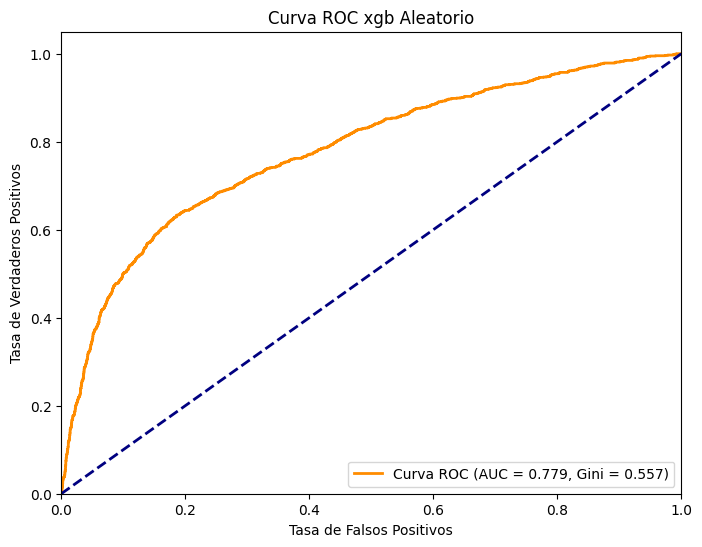

In [426]:
#Calculos para la ROC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, Predicciones_xgboost_clas)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
gini_xgb = 2 * roc_auc_xgb - 1
#Grafico de lacurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_xgb:.3f}, Gini = {gini_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC xgb Aleatorio')
plt.legend(loc="lower right")
plt.show()

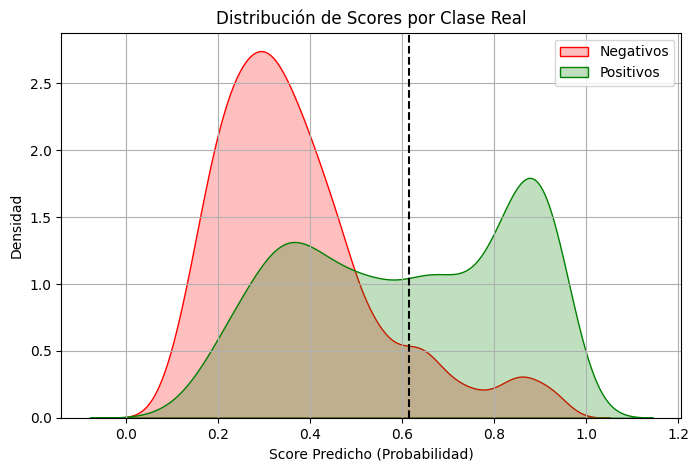

In [427]:
#Probabilidades por clase real
probs_negativos = Predicciones_xgboost_clas[y_test == 0]
probs_positivos = Predicciones_xgboost_clas[y_test == 1]

#Grafico de las distribuciones
plt.figure(figsize=(8, 5))
sns.kdeplot(probs_negativos, fill=True, color='red', label='Negativos')
sns.kdeplot(probs_positivos, fill=True, color='green', label='Positivos')

#Umbral
umbral = 0.615
plt.axvline(umbral, color='black', linestyle='--')

plt.title('Distribución de Scores por Clase Real')
plt.xlabel('Score Predicho (Probabilidad)')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

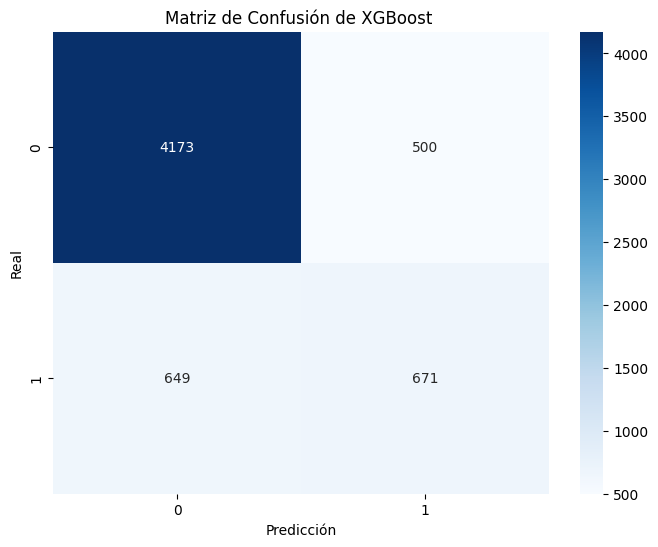

In [428]:
# Hacer predicciones con el modelo entrenado (0 y 1)
y_pred_xgb_clas = (Predicciones_xgboost_clas >= 0.615).astype(int)

# Crear la matriz de confusion
matriz_confusion_xgb = confusion_matrix(y_test, y_pred_xgb_clas)
#Grafico de la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_xgb, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión de XGBoost ')
plt.show()

In [429]:
#Obtenemos las metricas mas importantes
print(classification_report(y_test, y_pred_xgb_clas,digits=3))

              precision    recall  f1-score   support

           0      0.865     0.893     0.879      4673
           1      0.573     0.508     0.539      1320

    accuracy                          0.808      5993
   macro avg      0.719     0.701     0.709      5993
weighted avg      0.801     0.808     0.804      5993



##***Red Neuronal***

In [430]:
#Escalamos los datos, necesario cuando se trabaja con rede neuronales multicapa
scaler = RobustScaler()
X_train_red = scaler.fit_transform(X_train)
X_test_red = scaler.transform(X_test)
X_val_red = scaler.transform(X_val)

In [431]:
#Iniciamos la red
red_clas = Sequential()
#Primera capa con 128 neuronas
red_clas.add(Dense(units=128,activation='relu'))
red_clas.add(Dropout(0.2))
#segunda capa con 64 neuronas
red_clas.add(Dense(units=64,activation='relu'))
red_clas.add(Dropout(0.2))
#tercera capa con 32 neuronas
red_clas.add(Dense(units=32,activation='relu'))
red_clas.add(Dropout(0.3))
#Capa fina de salida
red_clas.add(Dense(units=1,activation='sigmoid'))
#compilador con metricas
red_clas.compile(optimizer='adam',loss='binary_crossentropy', metrics=['binary_accuracy'])

In [432]:
#Callback para guardar el modelo y earlystopping
callbacks = [EarlyStopping(min_delta=0.001, patience=12, restore_best_weights=True)]

In [433]:
#Ajustamos el modelo a nuestros datos
red_clas.fit(
          x=X_train_red, y=y_train, epochs=100,
          validation_data=(X_val_red, y_val),
          callbacks=callbacks,
          shuffle=True
)

Epoch 1/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - binary_accuracy: 0.7675 - loss: 0.5479 - val_binary_accuracy: 0.8209 - val_loss: 0.4472
Epoch 2/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - binary_accuracy: 0.8162 - loss: 0.4545 - val_binary_accuracy: 0.8212 - val_loss: 0.4408
Epoch 3/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.8149 - loss: 0.4434 - val_binary_accuracy: 0.8256 - val_loss: 0.4402
Epoch 4/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - binary_accuracy: 0.8184 - loss: 0.4442 - val_binary_accuracy: 0.8237 - val_loss: 0.4387
Epoch 5/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.8185 - loss: 0.4422 - val_binary_accuracy: 0.8242 - val_loss: 0.4388
Epoch 6/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - binary_accuracy: 0.8169 - loss: 0.4426 - val_binary_accuracy: 0.8192 - val_loss: 0.4399
Epoch 7/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_accuracy: 0.8156 - loss: 0.4383 - val_binary_accuracy: 0.8256 - val_loss: 0.4363

In [434]:
#Obtenemos las probabilidades de los datos de prueba usando nuestro modelo
Predicciones_red_clas=red_clas.predict(X_test_red)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


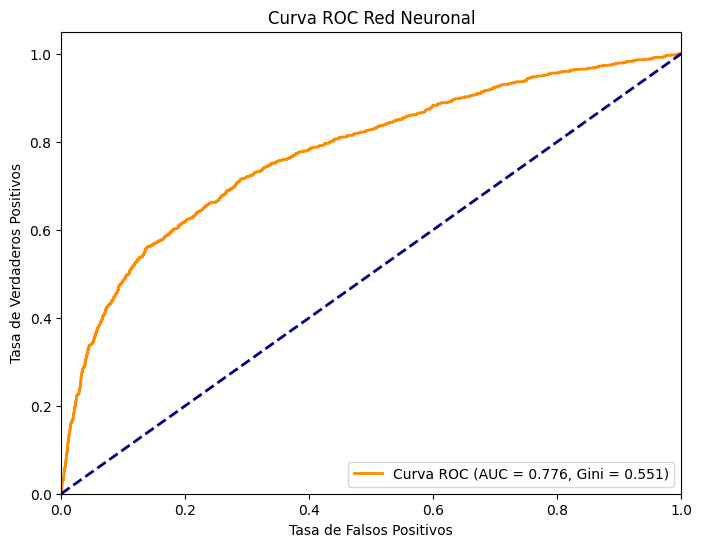

In [435]:
#Calculos para la ROC
fpr_red, tpr_red, thresholds_red = roc_curve(y_test, Predicciones_red_clas)
roc_auc_red = auc(fpr_red, tpr_red)
gini_red = 2 * roc_auc_red - 1
#Grafico de lacurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_red, tpr_red, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_red:.3f}, Gini = {gini_red:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Red Neuronal')
plt.legend(loc="lower right")
plt.show()

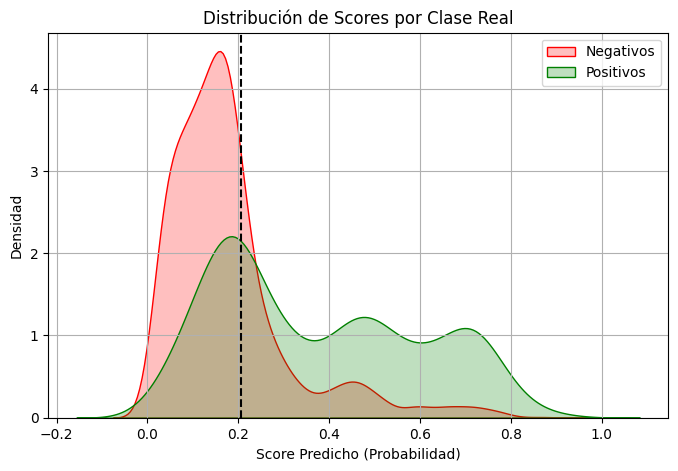

In [436]:
#Separaración de probabilidades por clase real
probs_red_negativos = Predicciones_red_clas[y_test == 0].ravel()
probs_red_positivos = Predicciones_red_clas[y_test == 1].ravel()

#Grafico de distribuciones
plt.figure(figsize=(8, 5))
sns.kdeplot(probs_red_negativos, fill=True, color='red', label='Negativos')
sns.kdeplot(probs_red_positivos, fill=True, color='green', label='Positivos')

#Umbral
umbral = 0.2061
plt.axvline(umbral, color='black', linestyle='--')
plt.title('Distribución de Scores por Clase Real')
plt.xlabel('Score Predicho (Probabilidad)')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

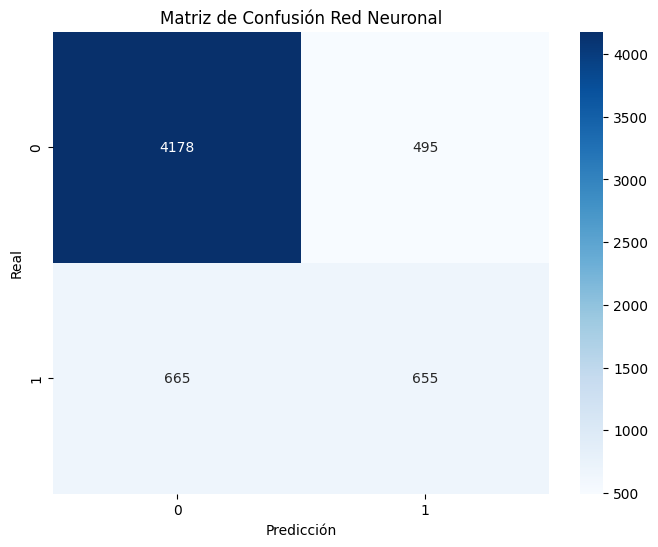

In [437]:
# Hacer predicciones con el modelo entrenado (0 y 1)
y_pred_red_clas = (Predicciones_red_clas >= 0.326).astype(int)

# Crear la matriz de confusion
matriz_confusion_red = confusion_matrix(y_test, y_pred_red_clas)

#Grafico de la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_red, annot=True, fmt="d", cmap="Blues")

plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Red Neuronal')
plt.show()

In [438]:
#Obtenemos las metricas mas importantes
print(classification_report(y_test, y_pred_red_clas,digits=3))

              precision    recall  f1-score   support

           0      0.863     0.894     0.878      4673
           1      0.570     0.496     0.530      1320

    accuracy                          0.806      5993
   macro avg      0.716     0.695     0.704      5993
weighted avg      0.798     0.806     0.802      5993



#**Mejor Modelo de Clasificación**

Se consideró que el mejor modelo requiere darnos la mejor predicción para aquellas personas que no van a pagar y poder indentificar de manera confiable que clientes no van a pagar(default).

Por lo anterior se busca maximizar la metrica recall, es decir minimizar los Falsos Negativos (clientes que se les aprobó el credito, pero cayerón en default), pero tambien queremos que nuestró mejor modelo no sea tan propenso a aumentar demasiado los Falsos Positivos (cliente categorizadó como Default, sin embargo no cayó en Default) ya que tambien nos interesa dar prestamos para ganar de ellos.

Para la comparación de modelos se consideró una cantidad de FP=500
obtuvimos lo siguiente:

|modelo|umbral|recall||FN|acurracy|F1|
|---||---|---|---|---|---|
|Regresión Logística|0.475|0.43||758|0.79|0.47|
|Bosque Aleatorio|0.586|0.49||672|0.80 |0.53 |
|XGBoost|0.615|0.51||649| 0.81| 0.54|
|Red Neuronal|0.326|0.48||687| 0.804|0.526|

Por lo tanto el mejor modelo es **XGBoost**. Pero en general el desempeño de los modelos es bastante parecido.

In [439]:
#Obtenemos las variables SHAP
explainer_clas = shap.TreeExplainer(XGBoost_clas)
shap_values_clas = explainer_clas(X_test)


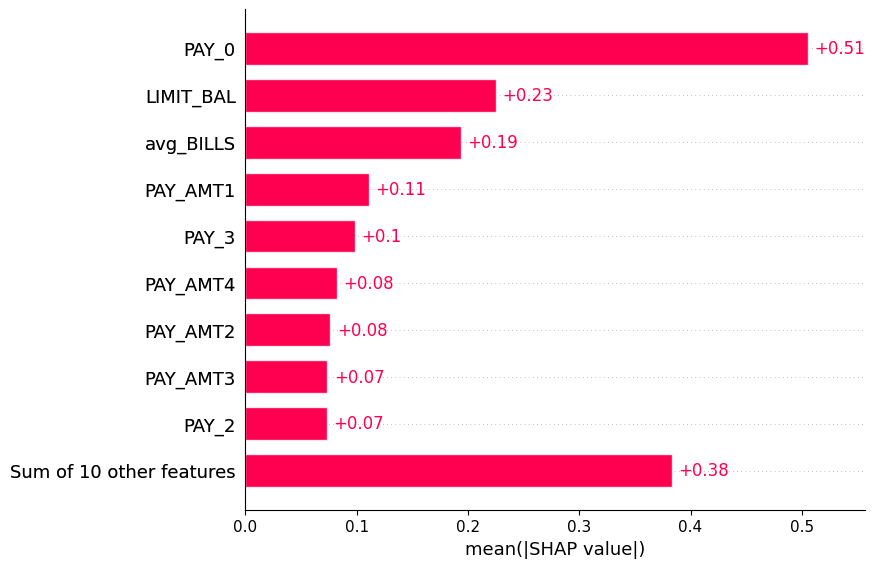

In [440]:
#graficamos los valores SHAP
shap.plots.bar(shap_values_clas)
plt.show()

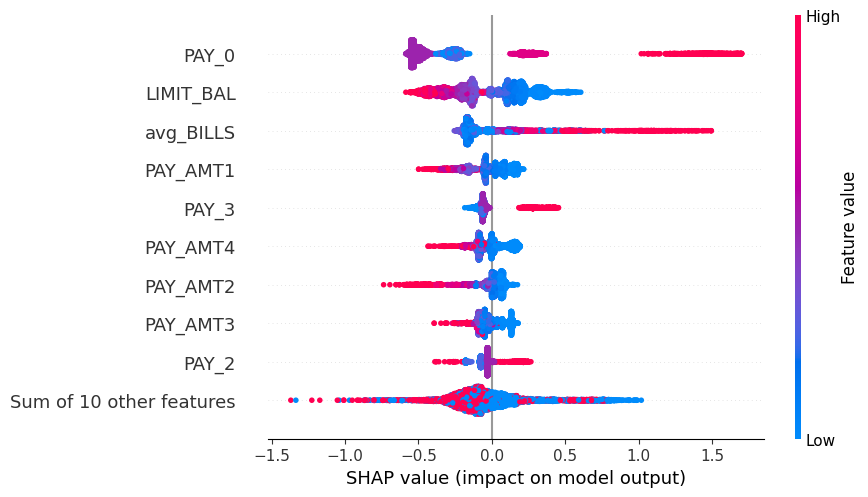

In [441]:
#Grafico del comportamiento de las shap de cada varible
shap.plots.beeswarm(shap_values_clas)
plt.show()

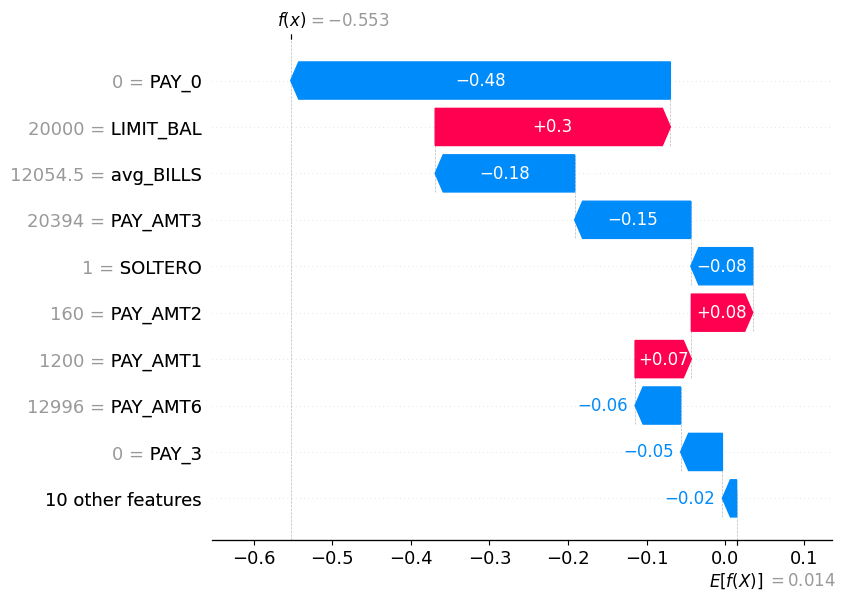

In [442]:
#Ejemplo de prediccion del primer valor de X_test
shap.plots.waterfall(shap_values_clas[2])

Podemos observar que las tres variables con mayor influencia en los log-odds son PAY_0, LIMIT_BAL y AVG_BILLS. En particular, el gráfico beeswarm muestra que, a medida que LIMIT_BAL toma valores más altos, los log-odds tienden a volverse más negativos, lo que indica que esta variable reduce la probabilidad estimada por el modelo.

Por ello, una vez elegido un modelo, es recomendable revisar los valores SHAP para verificar si no existe overfitting debido a variables correlacionadas, identificar cuáles son las variables más relevantes al otorgar crédito y comprender cómo el modelo discrimina entre distintos clientes. En conjunto, los valores y gráficos SHAP proporcionan una visión clara y profunda de cómo funciona el modelo y qué factores impulsan las predicciones.

#Conclusiones y Recomendaciones

Para los modelos de regresión, el mejor desempeño lo mostró el Bosque Aleatorio; en tareas de clasificación, el modelo líder fue XGBoost. Esto sugiere que, en problemas de crédito, los métodos basados en árboles de decisión suelen ser una opción muy adecuada.

Desde el punto de vista del negocio, el uso de estos modelos reduce la incertidumbre en la evaluación de riesgo. En nuestro caso de clasificación, el modelo logró identificar previamente al 11.2% de los clientes que terminarían en default y correctamente clasificó al 69.7% de los clientes que no cayeron en default. No obstante, los modelos no son infalibles: observamos un 8.3% de falsos positivos (clientes que fueron predichos como en riesgo de default pero no lo fueron) y un 10.8% de falsos negativos (clientes que se predijo como no en riesgo y que sí cayeron en default).

En cuanto a los modelos de regresion, se noto dificultad para predecir muy bien los montos que pagaría cada persona. Sin embargo, disponer de una predicción del pago esperado reduce la incertidumbre en la gestión de cobros. Con un MAE de 1,563 unidades, es decir se acierta en promedio con una desviación de ese orden respecto al pago real; esto permite, por ejemplo, estimar con más confianza los ingresos esperados, priorizar clientes para campañas de cobro y ajustar límites o recordatorios automáticos para clientes en riesgo de reducción de pagos.

Estas limitaciones en las predicciones pueden explicarse en parte por la ausencia de variables clave en el dataset. Por ejemplo, la variable BILL habría sido más útil si incluyera el monto adeudado del pago anterior y el crédito consumido en ese mes. También faltaron datos relevantes como salario mensual, número de tarjetas de crédito del cliente, tipo de tarjeta y codigo postal que suelen mejorar considerablemente la capacidad predictiva en productos de tarjetas de crédito.